# **BA 222 Group 12 Project**
### **Business Question**: What influences high anime scores, and how can studios improve future shows to enhance viewership?  

#### **Research Question**: What anime characteristics (e.g., genre, type, number of episodes, average member rating) are most strongly associated with higher average user scores, and what insights can anime studios derive from these relationships to potentially enhance the ratings of their future productions?



**Data Source**: https://www.kaggle.com/datasets/quanthan/top-15000-ranked-anime-dataset-update-to-32025 (change zip file name to `anime_archive.zip`)

#### Instructions to Run Code:
1.   Make sure the `anime_archive.zip` file is located on your google cloud drive at this location `content/drive/MyDrive`.
2. Run the cells as usual!

In [1]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # Statsmodel for estimating regressions

In [2]:
#google drive upload
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/anime_archive.zip", 'r') as zip_ref:
    zip_ref.extractall("anime_archive")

This zip file contains 2 csv files:

*   `top_anime_dataset.csv`
*   `top_anime_dataset_v2.csv`

Let's see quickly check the high level insights of both the files to decide which one is more suitable for our multiple regression model!


In [4]:
# import data into dataframe

anime_v1 = pd.read_csv('anime_archive/top_anime_dataset.csv')
anime_v2 = pd.read_csv('anime_archive/top_anime_dataset_v2.csv')

In [5]:
# Display the first few rows of the dataframe to verify import
print("Snippet of top_anime_dataset.csv")
display(anime_v1.head())

print("\nBasic Information and Statistics for top_anime_dataset.csv \n")
display(anime_v1.info(), anime_v1.describe())

Snippet of top_anime_dataset.csv


,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,synopsis,type,...,producers,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,...,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520,1035677
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353,3483268
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,...,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194507,1449844,2667979
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",Although the golden age of piracy is about to ...,TV Special,...,NaN,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2350,1970,68977,91278
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense",Seeking to restore humanity's diminishing hope...,TV,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60500,1671010,2407861



Basic Information and Statistics for top_anime_dataset.csv 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8355 non-null   object 
 5   japanese_names  14953 non-null  object 
 6   score           15000 non-null  float64
 7   genres          13397 non-null  object 
 8   synopsis        14527 non-null  object 
 9   type            14999 non-null  object 
 10  episodes        14885 non-null  float64
 11  premiered       4686 non-null   object 
 12  producers       9568 non-null   object 
 13  studios         12617 non-null  object 
 14  source          15000 non-null  object 
 15  duration        15000 non-null  object 
 16  rating        

None

,anime_id,score,episodes,rank,popularity,favorites,scored_by,members
count,15000.000000,15000.000000,14885.000000,11921.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04
mean,25735.652533,6.673484,12.662009,5947.337723,8485.094133,803.284667,3.586614e+04,7.021481e+04
std,19322.104925,0.703748,50.303656,3434.518105,5475.365792,6103.432034,1.321266e+05,2.204408e+05
min,1.000000,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,1.800000e+02
25%,5852.750000,6.110000,1.000000,2975.000000,3854.750000,2.000000,5.267500e+02,1.598000e+03
50%,27827.000000,6.580000,2.000000,5944.000000,7913.500000,11.000000,2.490500e+03,6.755500e+03
75%,40835.250000,7.170000,12.000000,8918.000000,12575.250000,92.250000,1.529800e+04,3.788850e+04
max,60988.000000,9.310000,3057.000000,11923.000000,21856.000000,234344.000000,2.904954e+06,4.116124e+06


In [6]:
# Display the first few rows of the dataframe to verify import
print("Snippet of top_anime_dataset_v2.csv")
display(anime_v2.head())

print("\nBasic Information and Statistics for top_anime_dataset_v2.csv \n")
display(anime_v2.info(), anime_v2.describe())

Snippet of top_anime_dataset_v2.csv


,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,themes,demographics,...,producers,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",NaN,Shounen,...,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63387,605478,1038347
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",Military,Shounen,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,...,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194580,1450481,2669303
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",NaN,Shounen,...,NaN,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2334,1976,69555,92128
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440



Basic Information and Statistics for top_anime_dataset_v2.csv 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8358 non-null   object 
 5   japanese_names  14954 non-null  object 
 6   score           15000 non-null  float64
 7   genres          13399 non-null  object 
 8   themes          9923 non-null   object 
 9   demographics    4408 non-null   object 
 10  synopsis        14532 non-null  object 
 11  type            14999 non-null  object 
 12  episodes        14888 non-null  float64
 13  premiered       4684 non-null   object 
 14  producers       9571 non-null   object 
 15  studios         12621 non-null  object 
 16  source     

None

,anime_id,score,episodes,rank,popularity,favorites,scored_by,members
count,15000.000000,15000.000000,14888.000000,11920.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04
mean,25738.923000,6.673692,12.653546,5947.145302,8492.495600,803.692000,3.588572e+04,7.025274e+04
std,19324.437734,0.703494,50.295837,3434.731901,5485.410907,6106.092961,1.321802e+05,2.205379e+05
min,1.000000,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,1.810000e+02
25%,5852.750000,6.110000,1.000000,2968.750000,3855.750000,2.000000,5.270000e+02,1.598000e+03
50%,27827.000000,6.580000,2.000000,5945.500000,7916.500000,11.000000,2.492000e+03,6.761500e+03
75%,40838.250000,7.170000,12.000000,8917.000000,12583.250000,92.250000,1.531350e+04,3.789700e+04
max,61134.000000,9.310000,3057.000000,11909.000000,21869.000000,234514.000000,2.906007e+06,4.117781e+06


Data Dictionary:

`anime_id`: Unique identifier for the anime on MyAnimeList (MAL ID).  
`anime_url`: URL link to the anime's page on MyAnimeList.   
`image_url`: URL of the anime's main visual or cover image (JPEG format).  
`name`: Official title of the anime.  
`english_name`: Official English title of the anime, if available.  
`japanese_names`: Official Japanese title of the anime, if available.  
`score`: Average score/rating of the anime on MyAnimeList (ranging from 1 to 10, higher is better).  
`genres`: Comma-separated list of genres associated with the anime (e.g., Action, Comedy, Fantasy).  
`themes`: Comma-separated list of themes associated with the anime (eg: Psychological, Time Travel)  
`demographics`: Target audiences of the anime (shounen, shoujo, seinen, josei)  
`synopsis`: A brief summary or plot description of the anime.  
`type`: Type of anime (e.g., TV, Movie, OVA, ONA, Special, Music).  
`episodes`: Number of episodes in the anime series (for TV series, OVAs, etc.).  
`premiered`: Season and year the anime premiered (e.g., "Fall 2013").  
`producers`: Comma-separated list of production companies involved in creating the anime.  
`studios`: Comma-separated list of animation studios responsible for the anime's animation.  
`source`: Original source material for the anime (e.g., Manga, Original, Light novel, Game).  
`duration`: Duration of each episode in minutes (for TV series, OVAs, etc.).  
`rating`: Age rating or content rating for the anime (e.g., PG-13, R+, G).  
`rank`: Ranking of the anime based on its score (lower rank is better). This dataset focuses on the top 15,000 anime by this rank.  
`popularity`: Popularity rank of the anime on MyAnimeList (lower rank is more popular).  
`favorites`: Number of users who have marked this anime as a favorite on MyAnimeList.  
`scored_by`: Number of users who have contributed to the anime's score.  
`members`: Number of users who are listed as members of the anime's MyAnimeList community.  

### Data Comparison

Key Similarities:
*   `anime_v1` dataframe has 15k observations and 22 columns
*   `anime_v2` dataframe has 15k observations and 24 columns

Key Difference:
*   `anime_v2` has 2 additional columns: `themes` and `demographics`. This is a significant difference, as these columns provide richer categorical information about the anime.
*   There is a slight difference in the number of non-null values for some columns (ex: `genres`, `synopsis`, `episodes`, etc.). This suggests that `anime_v2` has more complete data in some areas. There are also some missing values in the additional columns which is as expected.

Descriptive Statistics:
*  `score`: The mean is slightly higher in `anime_v2` (6.673692 vs. 6.673484). The standard deviation has a similar trend. This suggests that the overall distributions of scores is consistent between the two datasets.
* **Overall**: The descriptive statistics for the numerical columns are very similar between the two datasets. This indicates that the distributions of these variables haven't changed much in the updated version.  

Now, let's investigate how the missing values compare for both datasets!

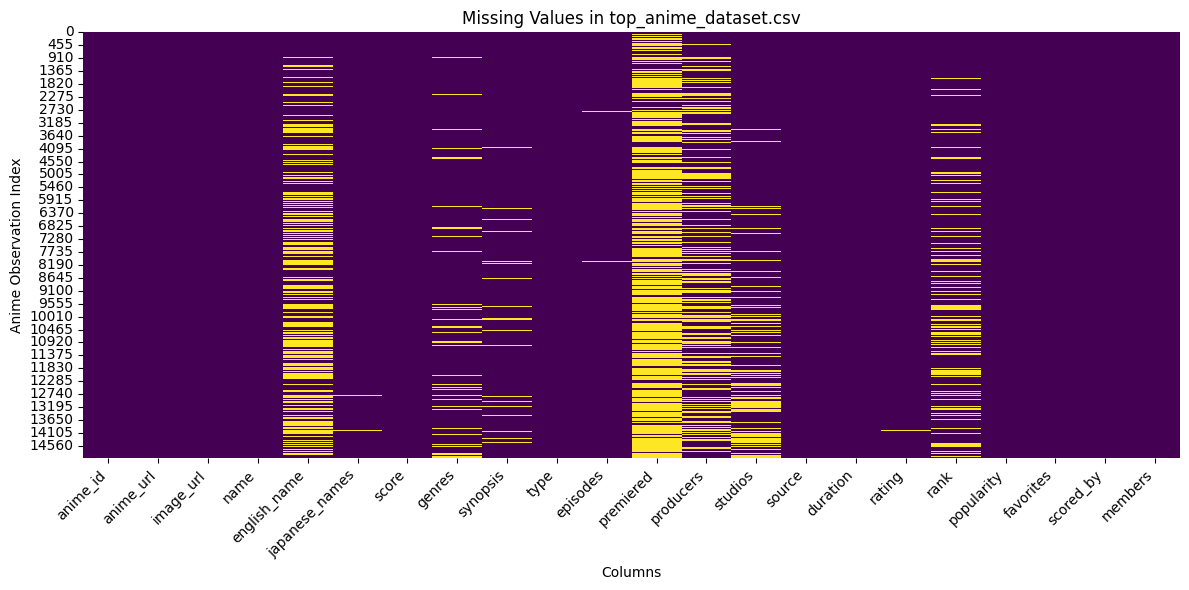


Percentage of Missing Values in top_anime_dataset.csv:
premiered         68.760000
english_name      44.300000
producers         36.213333
rank              20.526667
studios           15.886667
genres            10.686667
synopsis           3.153333
episodes           0.766667
rating             0.453333
japanese_names     0.313333
type               0.006667
dtype: float64


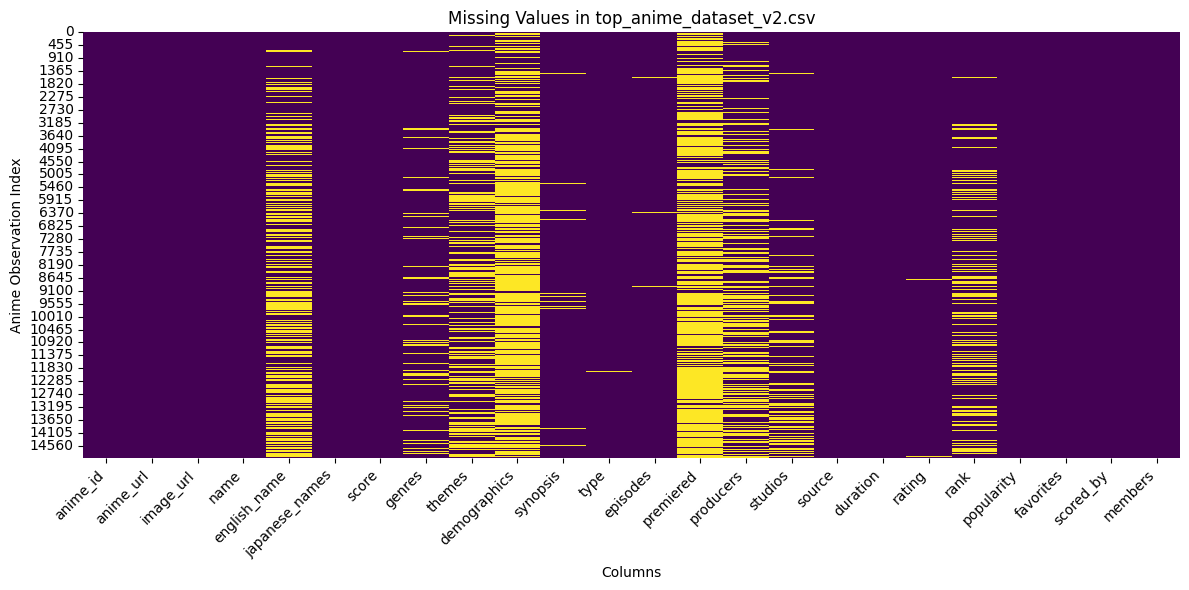


Percentage of Missing Values in top_anime_dataset_v2.csv:
demographics      70.613333
premiered         68.773333
english_name      44.280000
producers         36.193333
themes            33.846667
rank              20.533333
studios           15.860000
genres            10.673333
synopsis           3.120000
episodes           0.746667
rating             0.453333
japanese_names     0.306667
type               0.006667
dtype: float64


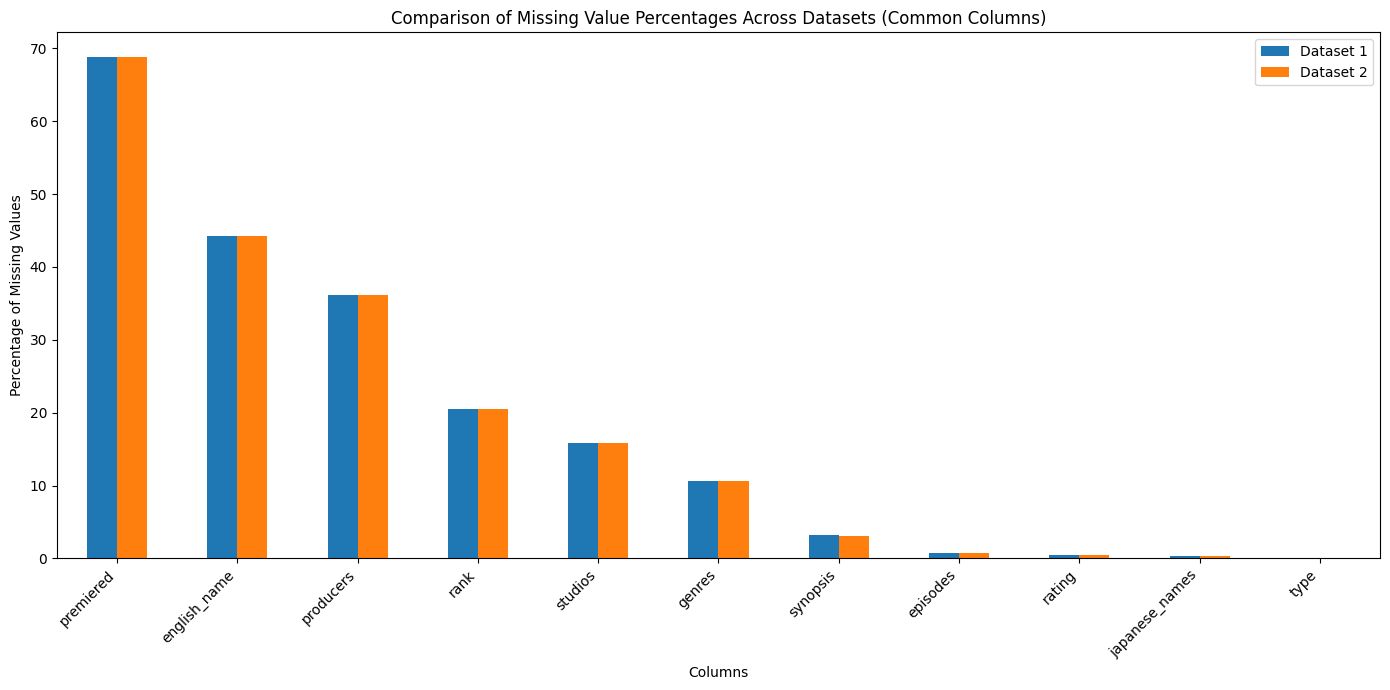


Percentage of Missing Values in New Columns of top_anime_dataset_v2.csv:
demographics    70.613333
themes          33.846667
dtype: float64


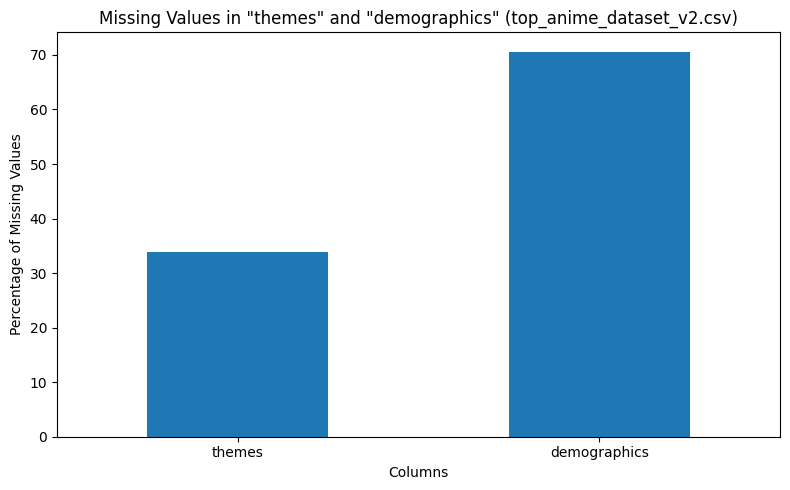

In [7]:
# --- Visualize Missing Values for the First Dataset ---
plt.figure(figsize=(12, 6))
sns.heatmap(anime_v1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in top_anime_dataset.csv')
plt.xlabel('Columns')
plt.ylabel('Anime Observation Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate percentage of missing values for the first dataset
missing_percentage_df1 = (anime_v1.isnull().sum() / len(anime_v1)) * 100
missing_percentage_df1 = missing_percentage_df1[missing_percentage_df1 > 0].sort_values(ascending=False)
print("\nPercentage of Missing Values in top_anime_dataset.csv:")
print(missing_percentage_df1)

# --- Visualize Missing Values for the Second Dataset ---
plt.figure(figsize=(12, 6))
sns.heatmap(anime_v2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in top_anime_dataset_v2.csv')
plt.xlabel('Columns')
plt.ylabel('Anime Observation Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate percentage of missing values for the second dataset
missing_percentage_df2 = (anime_v2.isnull().sum() / len(anime_v2)) * 100
missing_percentage_df2 = missing_percentage_df2[missing_percentage_df2 > 0].sort_values(ascending=False)
print("\nPercentage of Missing Values in top_anime_dataset_v2.csv:")
print(missing_percentage_df2)

# --- Comparative Bar Plot of Missing Value Percentages (Common Columns) ---
common_cols = list(set(anime_v1.columns) & set(anime_v2.columns))
missing_df1_common = (anime_v1[common_cols].isnull().sum() / len(anime_v1)) * 100
missing_df2_common = (anime_v2[common_cols].isnull().sum() / len(anime_v2)) * 100

missing_df = pd.DataFrame({
    'Dataset 1': missing_df1_common[missing_df1_common > 0].sort_values(ascending=False),
    'Dataset 2': missing_df2_common[missing_df2_common > 0].sort_values(ascending=False)
})

missing_df = missing_df.sort_values(by='Dataset 1', ascending=False)
missing_df.plot(kind='bar', figsize=(14, 7))
plt.title('Comparison of Missing Value Percentages Across Datasets (Common Columns)')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Missing Values in the New Columns of Dataset 2 ---
if 'themes' in anime_v2.columns and 'demographics' in anime_v2.columns:
    missing_new_cols_df2 = (anime_v2[['themes', 'demographics']].isnull().sum() / len(anime_v2)) * 100
    print("\nPercentage of Missing Values in New Columns of top_anime_dataset_v2.csv:")
    print(missing_new_cols_df2.sort_values(ascending=False))

    missing_new_cols_df2.plot(kind='bar', figsize=(8, 5))
    plt.title('Missing Values in "themes" and "demographics" (top_anime_dataset_v2.csv)')
    plt.ylabel('Percentage of Missing Values')
    plt.xlabel('Columns')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

### Missing Values Analysis:

Missing Values in Common Columns:

*   High Missing Values
  * `premiered`: Around 68%-69% missing (very high in both)
  * `english_name:` Around 44% missing (high in both)
  * `producers`: Around 36% missing (substantial in both)
*   Moderate Missing Values
  * `rank`: Around 20% missing (noticeable in both)
  * `studios`: Around 16% missing (noticeable in both)
  * `genres`: Around 11% missing (noticeable in both)
  * `synopsis`: Around 3.2% missing in Dataset 1, slightly better at 3% in Dataset 2  
*   Low Missing Values
  * `episodes`: Less than 1% missing (very low in both)
  * `rating`: Less than 0.5% missing (very low in both)
  * `japanese_names`: Less than 0.5% missing (very low in both)
  * `type`: Negligible missingness (both)
*   No Missing Values
  * `anime_id`, `anime_url`, `image_url`, `name`, `score`, `source`, `duration`, `popularity`, `favorites`, `scored_by`, `members`: These columns are mostly complete in both datasets!

Missing Values in New Columns (Dataset 2 only):

* `themes`: Approximately 34% missing
* `demographics`: Approximately 70% missing (very high)

We chose the `top_anime_dataset_v2.csv` dataset since it has additional 2 columns which we thought could be interesting independent variables in our multiple regression model. However, the `demographics` column has 70% missing values which is a big limitation and potential to increase bias and produce less generalizable results. We aim to impute values based on other avaliable features like `genres`, `themes`, `type`, etc. This will involve building a classification model on the non-missing `demographics` data and then use it to predict the missing values.

In [8]:
anime = anime_v2.copy()
anime = anime.drop(columns=['japanese_names', 'english_name', 'producers', 'premiered', 'anime_url', 'image_url'])
anime.head()

,anime_id,name,score,genres,themes,demographics,synopsis,type,episodes,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,Sousou no Frieren,9.31,"Adventure, Drama, Fantasy",NaN,Shounen,During their decade-long quest to defeat the D...,TV,28.0,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63387,605478,1038347
1,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",Military,Shounen,After a horrific alchemy experiment goes wrong...,TV,64.0,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360
2,9253,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,Eccentric scientist Rintarou Okabe has a never...,TV,24.0,White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194580,1450481,2669303
3,60022,One Piece Fan Letter,9.06,"Action, Adventure, Fantasy",NaN,Shounen,Although the golden age of piracy is about to ...,TV Special,1.0,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2334,1976,69555,92128
4,38524,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,Seeking to restore humanity's diminishing hope...,TV,10.0,Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440


In [9]:
anime_clean = anime.dropna().reset_index(drop=True)
display(anime_clean.head())
print(anime_clean.info())

,anime_id,name,score,genres,themes,demographics,synopsis,type,episodes,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",Military,Shounen,After a horrific alchemy experiment goes wrong...,TV,64.0,Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360
1,38524,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,Seeking to restore humanity's diminishing hope...,TV,10.0,Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440
2,28977,Gintama°,9.05,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,"Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,Bandai Namco Pictures,Manga,24 min per ep,PG-13 - Teens 13 or older,6.0,344,17040,260544,656933
3,39486,Gintama: The Final,9.04,"Action, Comedy, Drama, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,Two years have passed following the Tendoshuu'...,Movie,1.0,Bandai Namco Pictures,Manga,1 hr 44 min,PG-13 - Teens 13 or older,7.0,1536,4442,78109,163583
4,9969,Gintama',9.02,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,"After a one-year hiatus, Shinpachi Shimura ret...",TV,51.0,Sunrise,Manga,24 min per ep,PG-13 - Teens 13 or older,9.0,401,8341,245960,580682


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      2572 non-null   int64  
 1   name          2572 non-null   object 
 2   score         2572 non-null   float64
 3   genres        2572 non-null   object 
 4   themes        2572 non-null   object 
 5   demographics  2572 non-null   object 
 6   synopsis      2572 non-null   object 
 7   type          2572 non-null   object 
 8   episodes      2572 non-null   float64
 9   studios       2572 non-null   object 
 10  source        2572 non-null   object 
 11  duration      2572 non-null   object 
 12  rating        2572 non-null   object 
 13  rank          2572 non-null   float64
 14  popularity    2572 non-null   int64  
 15  favorites     2572 non-null   int64  
 16  scored_by     2572 non-null   int64  
 17  members       2572 non-null   int64  
dtypes: float64(3), int64(5), obj

To clean the data we have dropped all rows that have any null values.   
Clean Data:
*   2572 rows
*   18 columns



### Imputation for `demographics`

In [10]:
relationship_df = pd.crosstab(anime['rating'], anime['demographics'], dropna=True)
print("Distribution of demographics by rating:")
display(relationship_df)

Distribution of demographics by rating:


demographics,Josei,Kids,"Kids, Shoujo","Kids, Shounen",Seinen,Shoujo,Shounen
rating,,,,,,,
G - All Ages,8,638,2,6,89,87,128
PG - Children,2,370,0,46,6,40,29
PG-13 - Teens 13 or older,105,23,0,0,460,268,1289
R - 17+ (violence & profanity),11,0,0,0,186,22,258
R+ - Mild Nudity,1,0,0,0,176,11,121
Rx - Hentai,14,0,0,0,1,0,0


In [11]:
rating_to_demographic_map = {
    'PG-13 - Teens 13 or older': 'Shounen',
    'R - 17+ (violence & profanity)': 'Shounen',
    'R+ - Mild Nudity': 'Seinen',
    'PG - Children': 'Kids',
    'G - All Ages': 'Kids',
    'Rx - Hentai': 'Josei'
}

# Function to map missing demographics based on rating
def fill_missing_demographics(row):
    if pd.isna(row['demographics']):
        if not pd.isna(row['rating']) and row['rating'] in rating_to_demographic_map:
            return rating_to_demographic_map[row['rating']]
    return row['demographics']

missing_demo_before = anime['demographics'].isna().sum()
print(f"Missing demographics before: {missing_demo_before}")

# Apply the mapping to fill missing demographics
anime['demographics'] = anime.apply(fill_missing_demographics, axis=1)

# Check the results
# Count missing values after filling
missing_demo_after = anime['demographics'].isna().sum()
print(f"Missing demographics after: {missing_demo_after}")
print(f"Filled {missing_demo_before - missing_demo_after} missing values")

Missing demographics before: 10592
Missing demographics after: 57
Filled 10535 missing values


In [12]:
anime = anime.dropna(subset=['demographics', 'rating', 'studios']).reset_index(drop=True)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12572 entries, 0 to 12571
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12572 non-null  int64  
 1   name          12572 non-null  object 
 2   score         12572 non-null  float64
 3   genres        11907 non-null  object 
 4   themes        8241 non-null   object 
 5   demographics  12572 non-null  object 
 6   synopsis      12213 non-null  object 
 7   type          12572 non-null  object 
 8   episodes      12475 non-null  float64
 9   studios       12572 non-null  object 
 10  source        12572 non-null  object 
 11  duration      12572 non-null  object 
 12  rating        12572 non-null  object 
 13  rank          10674 non-null  float64
 14  popularity    12572 non-null  int64  
 15  favorites     12572 non-null  int64  
 16  scored_by     12572 non-null  int64  
 17  members       12572 non-null  int64  
dtypes: float64(3), int64(5), o

# Handle Missing Values for `genres` and `themes`

In [13]:
# handle missing values in genres and themes!
anime[["genres", "themes"]].isna().sum()

,0
genres,665
themes,4331


### Understanding Word Frequency in Synopsis  

In [14]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources (only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the text (remove stopwords and punctuation)
def preprocess_synopsis(text):
    # Tokenize the text
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize

    # Remove stopwords and punctuation
    filtered_words = [lemmatizer.lemmatize(word) for word in words
                      if word not in stop_words and word not in string.punctuation]

    return ' '.join(filtered_words)

# Apply preprocessing to the 'synopsis' column
anime['clean_synopsis'] = anime['synopsis'].dropna().apply(preprocess_synopsis)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
# Example to check the output
display(anime[['synopsis', 'clean_synopsis']].head())

,synopsis,clean_synopsis
0,During their decade-long quest to defeat the D...,decade-long quest defeat demon king member her...
1,After a horrific alchemy experiment goes wrong...,horrific alchemy experiment go wrong elric hou...
2,Eccentric scientist Rintarou Okabe has a never...,eccentric scientist rintarou okabe never-endin...
3,Although the golden age of piracy is about to ...,although golden age piracy reach new height pe...
4,Seeking to restore humanity's diminishing hope...,seeking restore humanity 's diminishing hope s...


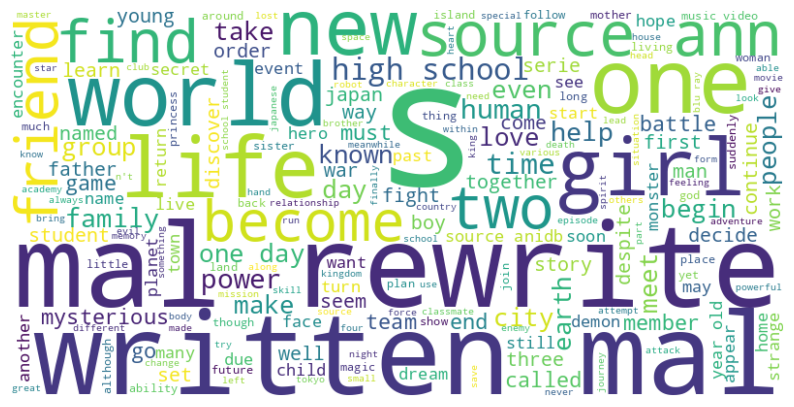

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Combine all unique synopses into one large text
synopsis_text = ' '.join(anime['clean_synopsis'].dropna().unique())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(synopsis_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In essence, the methodology identifies which synopses are most strongly associated with each genre/theme word (based on TF-IDF) and then extracts the other important words from those same synopses, considering these other important words as "related" to the initial genre/theme word. The implicit filtering happens because if a genre/theme word never appears in the synopses, it won't have a TF-IDF score and won't be processed further to find related words.

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import numpy as np

def create_tfidf_related_word_dictionary(df, column_to_extract, text_column, top_n_synopses=5, top_n_words=5):
    """
    Creates a dictionary of keywords (genres or themes) and related words from the text column
    using a TF-IDF based approach.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_to_extract (str): The name of the column containing comma-separated keywords.
        text_column (str): The name of the column containing the text to analyze (e.g., 'synopsis').
        top_n_synopses (int): The number of top synopses (based on TF-IDF score of the keyword) to consider.
        top_n_words (int): The number of top TF-IDF words to extract from the relevant synopses.

    Returns:
        defaultdict(list): A dictionary where keys are single-word keywords and values are lists of related words.
    """
    keyword_dict = defaultdict(list)
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[text_column].fillna(''))
    feature_names = vectorizer.get_feature_names_out()

    all_keywords = set()
    for index, row in df.dropna(subset=[column_to_extract]).iterrows():
        keywords_str = row[column_to_extract]
        if isinstance(keywords_str, str):
            keywords_list = [keyword.strip() for keyword in keywords_str.split(',')]
            all_keywords.update(keywords_list)

    for keyword in all_keywords:
        keyword_lower = keyword.lower()
        if keyword_lower in feature_names:
            keyword_index = np.where(feature_names == keyword_lower)[0][0]
            keyword_tfidf_scores = tfidf_matrix[:, keyword_index].toarray().flatten()
            relevant_synopsis_indices = np.argsort(keyword_tfidf_scores)[::-1][:top_n_synopses]

            related_words = set()
            for idx in relevant_synopsis_indices:
                if keyword_tfidf_scores[idx] > 0:  # Only consider synopses where the keyword has some weight
                    synopsis_vector = tfidf_matrix[idx]
                    synopsis_tfidf_scores = synopsis_vector.toarray().flatten()
                    top_word_indices = np.argsort(synopsis_tfidf_scores)[::-1][:top_n_words]
                    for word_index in top_word_indices:
                        word = feature_names[word_index]
                        if word != keyword_lower and len(word) > 2: # Avoid the keyword itself and very short words
                            related_words.add(word)
            keyword_dict[keyword] = list(related_words)

    return keyword_dict


def fill_missing_values(df, column_to_fill, text_column, keyword_dictionary):
    '''
    In summary, the fill_missing_values function looks at the synopsis of each movie that has a missing genre or theme.
    It then checks if any of the genre/theme keywords (from our dictionary) or their statistically related words appear in that synopsis.
    If they do, it predicts that the original genre/theme keyword is likely the missing value and fills it in.
    '''

    df_filled = df.copy()
    for index, row in df.loc[df[column_to_fill].isnull()].iterrows():
        synopsis = row[text_column].lower() if isinstance(row[text_column], str) else ''
        predicted_keywords = []
        for keyword, related_words in keyword_dictionary.items():
            if keyword.lower() in synopsis or any(word in synopsis for word in related_words):
                predicted_keywords.append(keyword)
        if predicted_keywords:
            df_filled.at[index, column_to_fill] = ', '.join(list(set(predicted_keywords)))
    return df_filled

In [18]:
# Create the genre dictionary using TF-IDF
genre_keyword_dict_tfidf = create_tfidf_related_word_dictionary(anime, 'genres', 'clean_synopsis', top_n_synopses=20, top_n_words=20)
print("Genre Keyword Dictionary (TF-IDF based - sample):", list(genre_keyword_dict_tfidf.items())[:5])

# Create the themes dictionary using TF-IDF
themes_keyword_dict_tfidf = create_tfidf_related_word_dictionary(anime, 'themes', 'clean_synopsis', top_n_synopses=10, top_n_words=10)
print("\nThemes Keyword Dictionary (TF-IDF based - sample):", list(themes_keyword_dict_tfidf.items())[:5])

# Fill missing genre values
anime = fill_missing_values(anime, 'genres', 'clean_synopsis', genre_keyword_dict_tfidf)

# Fill missing themes values
anime = fill_missing_values(anime, 'themes', 'clean_synopsis', themes_keyword_dict_tfidf)

print("\nNull Values for genres and themes:")
print(anime[["genres", "themes"]].isna().sum())

Genre Keyword Dictionary (TF-IDF based - sample): [('Comedy', ['extra', 'gravekeeper', 'skill', 'gratitude', 'bizarre', 'samurai', 'combine', 'famous', 'oni', 'witch', 'ovum', 'senile', 'gratin', 'tsukune', 'guardian', 'tatsunoko', 'grea', 'gravekeepers', 'old', 'ikkitousen', 'bonus', 'shopping', 'improvised', 'japanese', 'shadow', 'threatening', 'good', 'featuring', 'district', 'yozakura', 'minutia', 'datsuryoku', 'greatest', 'ennui', 'chan', 'adventure', 'life', 'motion', 'pit', 'girl', 'desert', 'dtv', 'seitokaichou', 'exclusively', 'machiko', 'god', 'based', 'bad', 'greedy', 'crazy', 'cause', 'enemy', 'parodying', 'grandfatherly', 'earth', 'neighborhood', 'prank', 'kei', 'chibi', 'wild', 'great', 'slow', 'wacky', 'grateful', 'countryside', 'anidb', 'powered', 'main', 'gaggle', 'restaurant', 'special', 'cooking', 'production', 'gratuitously', 'sheep', 'focused', 'graves', 'genius', 'gravesite', 'sextuplet', 'shunji', 'myth', 'acting', 'computer', 'crunchyroll', 'focus', 'anime', 'te

In [19]:
anime = anime.dropna(subset=['genres', 'themes', 'episodes']).reset_index(drop=True)
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12238 entries, 0 to 12237
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        12238 non-null  int64  
 1   name            12238 non-null  object 
 2   score           12238 non-null  float64
 3   genres          12238 non-null  object 
 4   themes          12238 non-null  object 
 5   demographics    12238 non-null  object 
 6   synopsis        12131 non-null  object 
 7   type            12238 non-null  object 
 8   episodes        12238 non-null  float64
 9   studios         12238 non-null  object 
 10  source          12238 non-null  object 
 11  duration        12238 non-null  object 
 12  rating          12238 non-null  object 
 13  rank            10538 non-null  float64
 14  popularity      12238 non-null  int64  
 15  favorites       12238 non-null  int64  
 16  scored_by       12238 non-null  int64  
 17  members         12238 non-null 

# Feature Engineering

In [20]:
anime = anime.drop(columns=['synopsis', 'clean_synopsis', 'rank', 'rating', 'popularity', 'favorites', 'members'])
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12238 entries, 0 to 12237
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      12238 non-null  int64  
 1   name          12238 non-null  object 
 2   score         12238 non-null  float64
 3   genres        12238 non-null  object 
 4   themes        12238 non-null  object 
 5   demographics  12238 non-null  object 
 6   type          12238 non-null  object 
 7   episodes      12238 non-null  float64
 8   studios       12238 non-null  object 
 9   source        12238 non-null  object 
 10  duration      12238 non-null  object 
 11  scored_by     12238 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.1+ MB


**Dependent Variable**: We want to create a weighted score that takes into account both the average `score` and the number of users who contributed to it (`scored_by`). This is a common technique to give more weight to scores that are based on a larger number of ratings. We want to make sure the resulting weighted score stays within a fixed range (1 to 10, similar to the original 'score').

Here's a way to achieve this using a technique inspired by the IMDb weighted average formula:

Adapted IMDb Weighted Average Formula:

$$ Weighted Score (WS) = \frac{(v \times R) + (m \times C)}{v + m} $$

Where:

R: is the average score for the anime (`score` column).  
v: is the number of users who scored the anime (`scored_by` column).  
C: is the average score across all anime in your dataset. This acts as a baseline.  
m: is a minimum number of votes required to be considered significant. We choose a value that represents a reasonable threshold of user participation at 75th percentile.  

[*Note: The choice of 'm' is subjective and depends on your data and what you consider a significant number of ratings. Why we do not need scaling: **Natural Range Preservation**: The IMDb weighted average formula inherently tries to keep the weighted score within a range similar to the original scores (1 to 10 in your case), especially if the overall average (C) also falls within that range. The weighting mechanism pulls scores of less-voted items towards the average and lets well-voted items retain their score more strongly.*]

**Independent Variables**: = {c(genres), c(themes), c(demographics), c(type), episodes, c(studios), c(source), duration}



In [21]:
C = anime['score'].mean()
print(f"Average score across all anime (C): {C:.2f}")
m = anime['scored_by'].quantile(0.75)  # Example: 75th percentile
print(f"Minimum votes required (m): {m:.0f}")

def weighted_score(row, m=m, C=C):
    v = row['scored_by']
    R = row['score']
    return ((v * R) + (m * C)) / (v + m)

anime['weighted_score'] = anime.apply(weighted_score, axis=1)

display(anime[['score', 'scored_by', 'weighted_score']].head())

Average score across all anime (C): 6.78
Minimum votes required (m): 23763


,score,scored_by,weighted_score
0,9.31,605478,9.214592
1,9.10,2196965,9.075213
2,9.07,1450481,9.033146
3,9.06,69555,8.480325
4,9.05,1671960,9.018240


In [22]:
anime = anime.drop(columns=['scored_by', 'score'])
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12238 entries, 0 to 12237
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        12238 non-null  int64  
 1   name            12238 non-null  object 
 2   genres          12238 non-null  object 
 3   themes          12238 non-null  object 
 4   demographics    12238 non-null  object 
 5   type            12238 non-null  object 
 6   episodes        12238 non-null  float64
 7   studios         12238 non-null  object 
 8   source          12238 non-null  object 
 9   duration        12238 non-null  object 
 10  weighted_score  12238 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


In [23]:
anime.head()

,anime_id,name,genres,themes,demographics,type,episodes,studios,source,duration,weighted_score
0,52991,Sousou no Frieren,"Adventure, Drama, Fantasy","Educational, Samurai, Vampire, Mythology, Hist...",Shounen,TV,28.0,Madhouse,Manga,24 min per ep,9.214592
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",Military,Shounen,TV,64.0,Bones,Manga,24 min per ep,9.075213
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Shounen,TV,24.0,White Fox,Visual novel,24 min per ep,9.033146
3,60022,One Piece Fan Letter,"Action, Adventure, Fantasy","Educational, Samurai, Vampire, Mythology, Hist...",Shounen,TV Special,1.0,Toei Animation,Light novel,24 min,8.480325
4,38524,Shingeki no Kyojin Season 3 Part 2,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,TV,10.0,Wit Studio,Manga,23 min per ep,9.018240


#### Converting `duration` to float

In [24]:
anime.duration.unique()[:10]

array(['24 min per ep', '24 min', '23 min per ep', '1 hr 44 min',
       '26 min per ep', '2 hr 10 min', '25 min per ep', '1 hr 50 min',
       '22 min per ep', '1 hr 12 min per ep'], dtype=object)

In [25]:
import re
def convert_duration_to_minutes(duration_str):
    """
    Converts a duration string (e.g., '24 min', '1 hr 44 min', '30 sec') to total minutes (float).
    Handles hours, minutes, and seconds, and returns None for unparseable strings.

    Args:
        duration_str (str): The duration string to convert.

    Returns:
        float: The total duration in minutes, or None if the string cannot be parsed.
    """
    if isinstance(duration_str, str):
        duration_str_lower = duration_str.lower()
        if 'unknown' in duration_str_lower:
            return np.nan  # Return NaN for 'Unknown' which will be dropped later

        hours_match = re.search(r'(\d+)\s*hr', duration_str_lower) or re.search(r'(\d+)hr', duration_str_lower)
        minutes_match = re.search(r'(\d+)\s*min', duration_str_lower) or re.search(r'(\d+)min', duration_str_lower)
        seconds_match = re.search(r'(\d+)\s*sec', duration_str_lower) or re.search(r'(\d+)sec', duration_str_lower)

        total_minutes = 0
        if hours_match:
            total_minutes += int(hours_match.group(1)) * 60
        if minutes_match:
            total_minutes += int(minutes_match.group(1))
        if seconds_match:
            total_minutes += int(seconds_match.group(1)) / 60

        return float(total_minutes) if total_minutes > 0 else np.nan
    return np.nan

In [26]:
anime['duration_minutes'] = anime['duration'].apply(convert_duration_to_minutes)
display(anime[['duration', 'duration_minutes']])

,duration,duration_minutes
0,24 min per ep,24.0
1,24 min per ep,24.0
2,24 min per ep,24.0
3,24 min,24.0
4,23 min per ep,23.0
...,...,...
12233,1 min,1.0
12234,17 min,17.0
12235,28 min per ep,28.0
12236,5 min,5.0


In [27]:
anime[anime.duration_minutes.isna()]

,anime_id,name,genres,themes,demographics,type,episodes,studios,source,duration,weighted_score,duration_minutes
1182,56215,Yi Nian Yong Heng 3rd Season,"Action, Adventure, Fantasy","Historical, Martial Arts",Shounen,ONA,59.0,B.CMAY PICTURES,Novel,Unknown,6.796857,NaN
4839,59434,Shen Mu 2nd Season,"Action, Adventure, Fantasy","Historical, Martial Arts",Shounen,ONA,27.0,Wonder Cat Animation,Web novel,Unknown,6.784544,NaN
7791,30481,Ginga Tetsudou 999 for Planetarium,"Adventure, Drama, Sci-Fi",Space,Kids,Movie,1.0,Toei Animation,Unknown,Unknown,6.780873,NaN
8572,23943,Kidou Senshi Gundam UC: One of Seventy Two,"Suspense, Hentai, Adventure, Action, Romance, ...",Mecha,Shounen,Special,1.0,Sunrise,Novel,Unknown,6.774281,NaN
10097,35018,Osomatsu-san: Haru no Zenkoku Dai Senbatsu Jou...,Comedy,Parody,Shounen,Movie,1.0,Pierrot,Manga,Unknown,6.775986,NaN
10894,38087,Osomatsu-san: Hajimaru Hajimari,"Comedy, Fantasy",Parody,Shounen,Special,6.0,Pierrot,Manga,Unknown,6.779190,NaN


In [28]:
anime = anime.dropna(subset=['duration_minutes']).copy()
anime = anime.drop(columns=['duration'])
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12232 entries, 0 to 12237
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          12232 non-null  int64  
 1   name              12232 non-null  object 
 2   genres            12232 non-null  object 
 3   themes            12232 non-null  object 
 4   demographics      12232 non-null  object 
 5   type              12232 non-null  object 
 6   episodes          12232 non-null  float64
 7   studios           12232 non-null  object 
 8   source            12232 non-null  object 
 9   weighted_score    12232 non-null  float64
 10  duration_minutes  12232 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.1+ MB


#### Creating dummy variables for categorical variables

In [29]:
def get_unique_words(df, column):
    """
    Extracts and returns a set of unique genre words from a DataFrame column
    containing comma-separated strings.

    Args:
        df (pd.DataFrame): The DataFrame containing the genre column.
        genre_column (str): The name of the column containing comma-separated genres.

    Returns:
        set: A set of unique genre words.
    """
    all_genres = df[column].dropna()
    unique_words = set()
    for genres_str in all_genres:
        if isinstance(genres_str, str):
            genre_list = [genre.strip() for genre in genres_str.split(',')]
            unique_words.update(genre_list)
    return unique_words

In [30]:
columns_to_dummy = ['genres', 'themes', 'demographics', 'type', 'studios', 'source']
for i in columns_to_dummy:
    unique_vals = get_unique_words(anime, i)
    print(f"------------------{i}--------------------")
    print(f"{len(unique_vals)} unique values")
    print(f"Value counts:")
    display(anime[i].value_counts())

------------------genres--------------------
21 unique values
Value counts:


,count
genres,
Comedy,953
Hentai,813
"Action, Adventure, Fantasy",420
"Action, Sci-Fi",338
Slice of Life,318
...,...
"Adventure, Comedy, Hentai",1
"Hentai, Action, Fantasy, Gourmet, Sports, Mystery",1
"Adventure, Drama, Fantasy, Horror, Sci-Fi, Supernatural",1


------------------themes--------------------
52 unique values
Value counts:


,count
themes,
School,622
Music,450
Mecha,351
Historical,324
Mythology,196
...,...
"Childcare, Parody, Reincarnation, School, Showbiz, Educational, Workplace, Music, Villainess, Military, Survival, Samurai, Vampire, Harem, Anthropomorphic, Space, Historical, Mecha",1
"Childcare, Medical, Detective, Parody, School, Showbiz, Educational, Workplace, Music, Survival, Psychological, Vampire, Racing, Harem, Anthropomorphic, Space, Historical, Mecha",1
"Parody, Music, Survival, Racing, Reincarnation, Mecha",1


------------------demographics--------------------
5 unique values
Value counts:


,count
demographics,
Shounen,7129
Kids,2163
Seinen,1373
Josei,1118
Shoujo,404
"Kids, Shounen",43
"Kids, Shoujo",2


------------------type--------------------
9 unique values
Value counts:


,count
type,
TV,4474
OVA,2369
Movie,1703
ONA,1396
Special,1160
TV Special,469
Music,443
CM,139
PV,79


------------------studios--------------------
952 unique values
Value counts:


,count
studios,
Toei Animation,682
Sunrise,509
J.C.Staff,357
Madhouse,314
TMS Entertainment,282
...,...
"ufotable, feel., Studio Flag",1
"G-Lam, Studio CA",1
CCTV Animation,1


------------------source--------------------
17 unique values
Value counts:


,count
source,
Manga,4169
Original,2889
Light novel,983
Visual novel,897
Game,827
Novel,526
Unknown,496
Other,366
Web manga,357


In [31]:
anime['demographics'] = anime['demographics'].apply(
    lambda x: "Shounen" if isinstance(x, str) and "Kids, Shounen" in x
    else ("Shoujo" if isinstance(x, str) and "Kids, Shoujo" in x else (x.strip() if isinstance(x, str) else x))
)

In [32]:
anime.demographics.unique()

array(['Shounen', 'Seinen', 'Shoujo', 'Kids', 'Josei'], dtype=object)

In [33]:
def create_top_n_dummies(df, column, n=10):
    value_counts = df[column].value_counts()
    top_n_values = list(value_counts.index[:n])
    new_col_name = f'{column}_top_{n}'
    df[new_col_name] = df[column].apply(lambda x: x if x in top_n_values else 'Other')
    dummy_cols = pd.get_dummies(df[new_col_name], prefix=column)
    df = pd.concat([df, dummy_cols], axis=1).drop(columns=[column, new_col_name])
    return df

In [34]:
anime_processed = anime.copy()

# Demographics and Type: Keep all dummies
anime_processed = pd.get_dummies(anime_processed, columns=['demographics'], prefix='demographics', dummy_na=False)
anime_processed = pd.get_dummies(anime_processed, columns=['type'], prefix='type', dummy_na=False)

# Genres: Keep top X, others as 'Other'
anime_processed = create_top_n_dummies(anime_processed, 'genres', n=5)

# Themes: Keep top X, others as 'Other'
anime_processed = create_top_n_dummies(anime_processed, 'themes', n=5)

# Source: Keep top X, others as 'Other'
anime_processed = create_top_n_dummies(anime_processed, 'source', n=5)

# Studios: Keep top X, others as 'Other'
anime_processed = create_top_n_dummies(anime_processed, 'studios', n=5)

# Display the shape of the processed DataFrame
print("Shape of the processed DataFrame:", anime_processed.shape)
display(anime_processed.head())

Shape of the processed DataFrame: (12232, 43)


,anime_id,name,episodes,weighted_score,duration_minutes,demographics_Josei,demographics_Kids,demographics_Seinen,demographics_Shoujo,demographics_Shounen,...,source_Manga,source_Original,source_Other,source_Visual novel,studios_J.C.Staff,studios_Madhouse,studios_Other,studios_Sunrise,studios_TMS Entertainment,studios_Toei Animation
0,52991,Sousou no Frieren,28.0,9.214592,24.0,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.075213,24.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,9253,Steins;Gate,24.0,9.033146,24.0,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
3,60022,One Piece Fan Letter,1.0,8.480325,24.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,38524,Shingeki no Kyojin Season 3 Part 2,10.0,9.018240,23.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [35]:
# Display the first few rows with the new dummy variables
anime_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12232 entries, 0 to 12237
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   anime_id                           12232 non-null  int64  
 1   name                               12232 non-null  object 
 2   episodes                           12232 non-null  float64
 3   weighted_score                     12232 non-null  float64
 4   duration_minutes                   12232 non-null  float64
 5   demographics_Josei                 12232 non-null  bool   
 6   demographics_Kids                  12232 non-null  bool   
 7   demographics_Seinen                12232 non-null  bool   
 8   demographics_Shoujo                12232 non-null  bool   
 9   demographics_Shounen               12232 non-null  bool   
 10  type_CM                            12232 non-null  bool   
 11  type_Movie                         12232 non-null  bool   


# Final Cleaned Dataset `anime_clean`

In [36]:
anime_clean = anime_processed.copy().reset_index(drop=True)
#anime_clean = anime_clean.drop(columns=['anime_url']).reset_index(drop=True)
display(anime_clean.head(5))
anime_clean.info()

,anime_id,name,episodes,weighted_score,duration_minutes,demographics_Josei,demographics_Kids,demographics_Seinen,demographics_Shoujo,demographics_Shounen,...,source_Manga,source_Original,source_Other,source_Visual novel,studios_J.C.Staff,studios_Madhouse,studios_Other,studios_Sunrise,studios_TMS Entertainment,studios_Toei Animation
0,52991,Sousou no Frieren,28.0,9.214592,24.0,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.075213,24.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,9253,Steins;Gate,24.0,9.033146,24.0,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
3,60022,One Piece Fan Letter,1.0,8.480325,24.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,38524,Shingeki no Kyojin Season 3 Part 2,10.0,9.018240,23.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12232 entries, 0 to 12231
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   anime_id                           12232 non-null  int64  
 1   name                               12232 non-null  object 
 2   episodes                           12232 non-null  float64
 3   weighted_score                     12232 non-null  float64
 4   duration_minutes                   12232 non-null  float64
 5   demographics_Josei                 12232 non-null  bool   
 6   demographics_Kids                  12232 non-null  bool   
 7   demographics_Seinen                12232 non-null  bool   
 8   demographics_Shoujo                12232 non-null  bool   
 9   demographics_Shounen               12232 non-null  bool   
 10  type_CM                            12232 non-null  bool   
 11  type_Movie                         12232 non-null  boo

# Exploratory Data Analysis

### Dependent Variable: Weighted Score

In [37]:
#Summary Statistics
anime_clean[['weighted_score']].describe()

,weighted_score
count,12232.000000
mean,6.914975
std,0.354350
min,5.893276
25%,6.756426
50%,6.780400
75%,6.936809
max,9.214592


Text(0.5, 0, 'weighted_score')

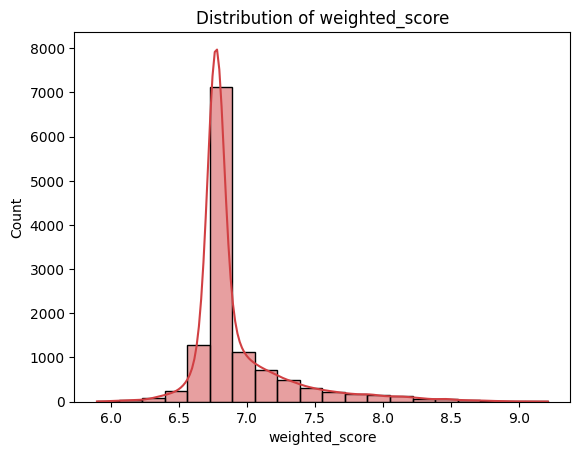

In [38]:
#Distribution
sns.histplot(anime_clean['weighted_score'], bins=20, kde=True, color="#d14043")
plt.title("Distribution of weighted_score")
plt.xlabel("weighted_score")

### Numerical Independent Variables: Episodes and Duration

Text(0.5, 1.0, 'weighted_score vs episodes')

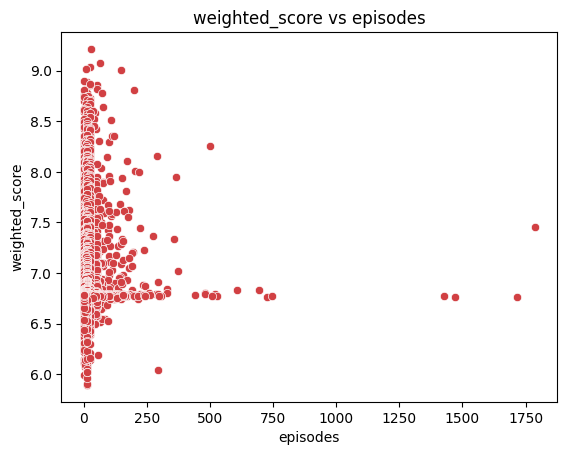

In [39]:
#Episodes Scatterplot
sns.scatterplot(x='episodes', y='weighted_score', data=anime_clean, color="#d14043")
plt.title("weighted_score vs episodes")

Text(0.5, 1.0, 'weighted_score vs duration_minutes')

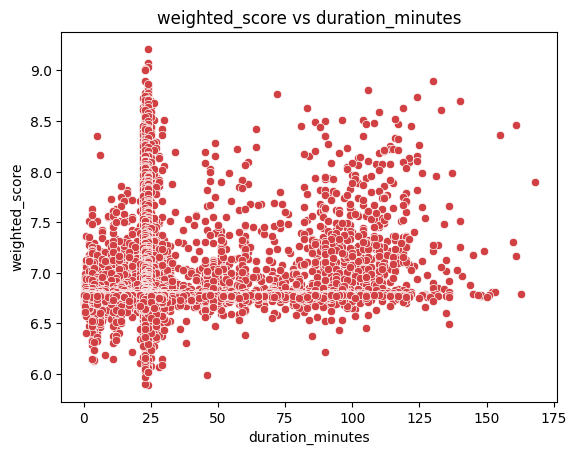

In [40]:
#Duration Scatterplot
sns.scatterplot(x='duration_minutes', y='weighted_score', data=anime_clean, color="#d14043")
plt.title("weighted_score vs duration_minutes")

In [41]:
#Correlation
anime_clean[['weighted_score', 'episodes', 'duration_minutes']].corr()

,weighted_score,episodes,duration_minutes
weighted_score,1.000000,0.047046,0.172408
episodes,0.047046,1.000000,-0.106558
duration_minutes,0.172408,-0.106558,1.000000


### Categorical Independent Variables: Genre, Theme, Demographic, Type, Source, Studio

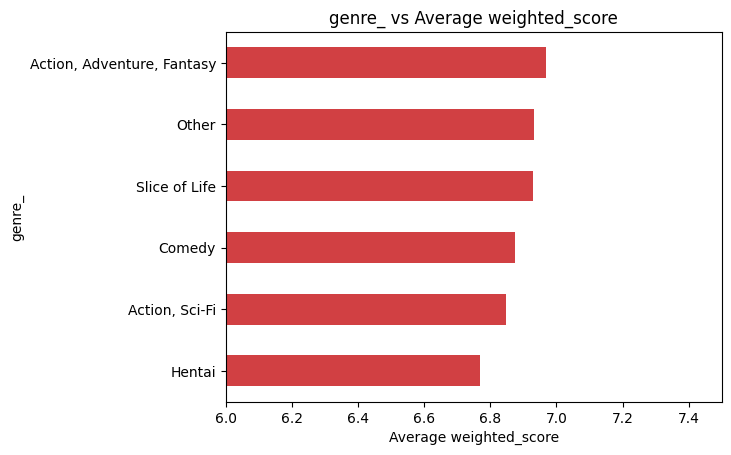

In [42]:
#Genre
genre_cols = [col for col in anime_clean.columns if col.startswith('genres_')]
genre_avg = {
    col.replace('genres_', ''): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in genre_cols
}
pd.Series(genre_avg).sort_values(ascending=True).plot(kind='barh', color="#d14043")
plt.title("genre_ vs Average weighted_score")
plt.xlabel("Average weighted_score")
plt.ylabel("genre_")
plt.xlim(6,7.5)
plt.show()

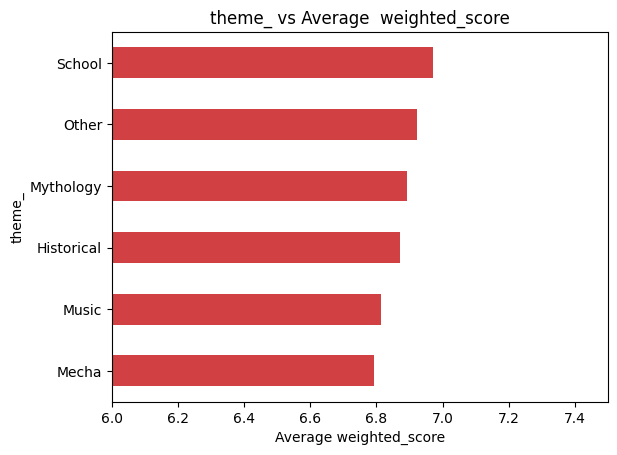

In [43]:
#Theme
theme_cols = [col for col in anime_clean.columns if col.startswith('themes_')]
theme_avg = {
    col.replace('themes_', ''): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in theme_cols
}
theme_avg_series = pd.Series(theme_avg).dropna().astype(float)
theme_avg_series.sort_values(ascending=True).plot(kind='barh', color="#d14043")
plt.title("theme_ vs Average  weighted_score")
plt.xlabel("Average weighted_score")
plt.ylabel("theme_")
plt.xlim(6,7.5)
plt.show()

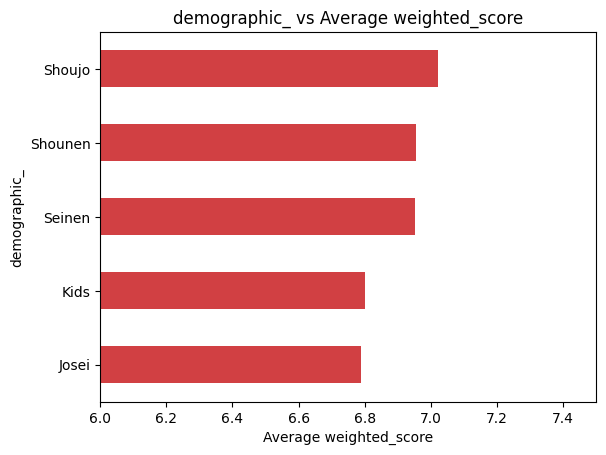

In [44]:
#Demographic
demo_cols = [col for col in anime_clean.columns if col.startswith("demographics_")]
demo_avg = {
    col.replace("demographics_", ""): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in demo_cols
}
pd.Series(demo_avg).sort_values(ascending=True).plot(kind='barh', color="#d14043", title= "demographic_ vs Average weighted_score")
plt.ylabel("demographic_")
plt.xlabel("Average weighted_score")
plt.xlim(6,7.5)
plt.show()

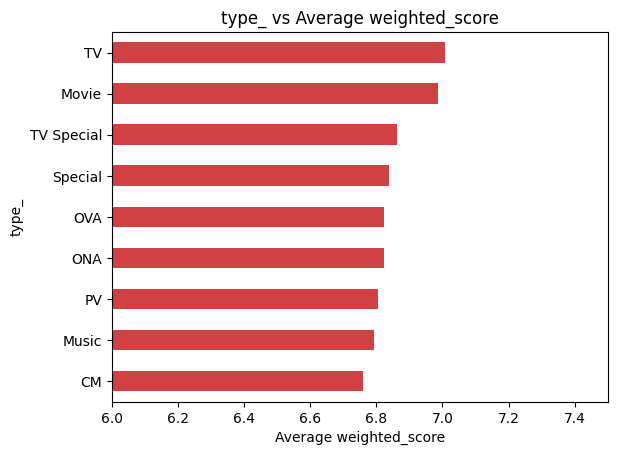

In [45]:
#Type
type_cols = [col for col in anime_clean.columns if col.startswith("type_")]
type_avg = {
    col.replace("type_", ""): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in type_cols
}
pd.Series(type_avg).sort_values(ascending=True).plot(kind='barh', color="#d14043", title="type_ vs Average weighted_score")
plt.ylabel("type_")
plt.xlabel("Average weighted_score")
plt.xlim(6,7.5)
plt.show()

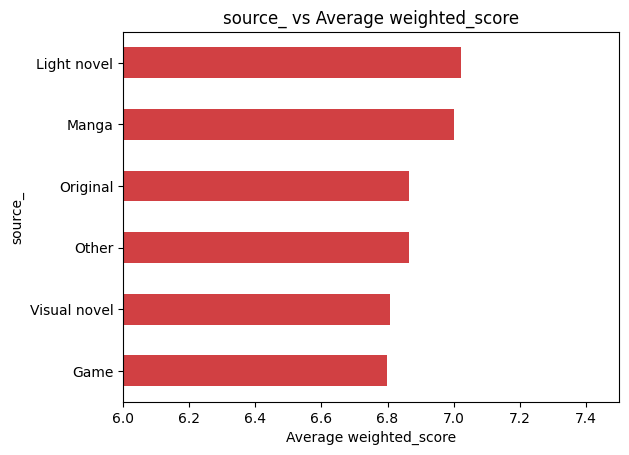

In [46]:
#Source
source_cols = [col for col in anime_clean.columns if col.startswith("source_")]
source_avg = {
    col.replace("source_", ""): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in source_cols
}
pd.Series(source_avg).sort_values(ascending=True).plot(kind='barh', color="#d14043", title="source_ vs Average weighted_score")
plt.ylabel("source_")
plt.xlabel("Average weighted_score")
plt.xlim(6,7.5)
plt.show()

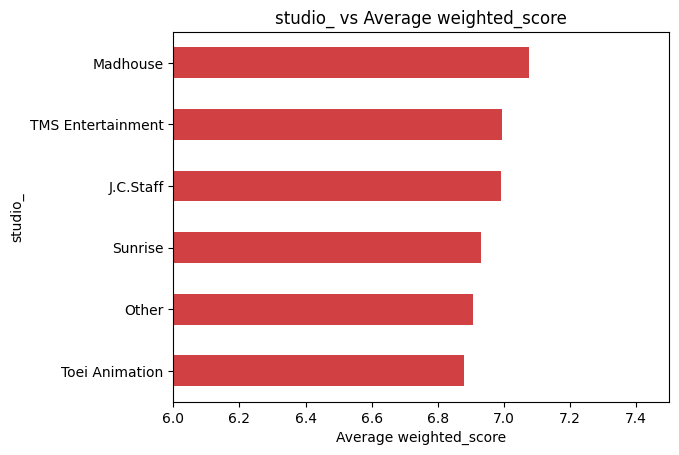

In [47]:
#Studio
studio_cols = [col for col in anime_clean.columns if col.startswith('studios_')]
studio_avg = {
    col.replace('studios_', ''): anime_clean[anime_clean[col] == 1]['weighted_score'].mean()
    for col in studio_cols
}
pd.Series(studio_avg).sort_values(ascending=True).plot(kind='barh', color="#d14043")
plt.title("studio_ vs Average weighted_score")
plt.xlabel("Average weighted_score")
plt.ylabel("studio_")
plt.xlim(6,7.5)
plt.show()

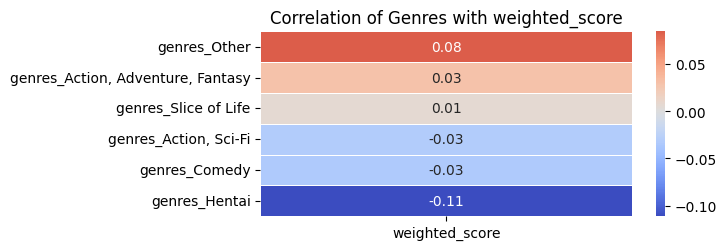

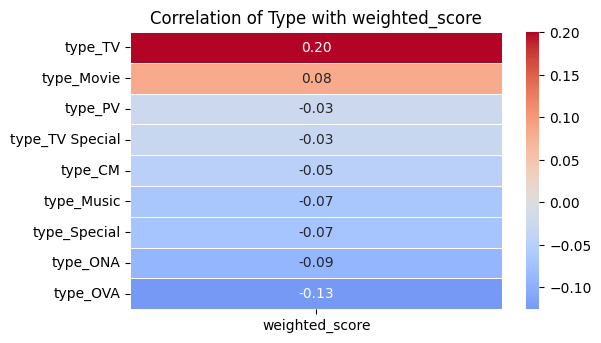

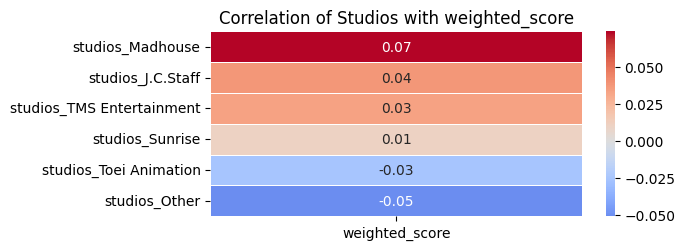

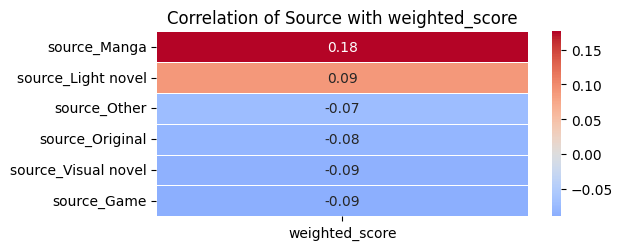

In [48]:
#Correlation Heatmaps
categories = {
    'Genres': [col for col in anime_clean.columns if col.startswith('genres_')],
    'Themes': [col for col in anime_clean.columns if col.startswith('theme_')],
    'Type': [col for col in anime_clean.columns if col.startswith('type_')],
    'Studios': [col for col in anime_clean.columns if col.startswith('studios_')],
    'Source': [col for col in anime_clean.columns if col.startswith('source_')],
    'Demographics': [col for col in anime_clean.columns if col.startswith('demographic_')],
}
for cat_name, cols in categories.items():
    if len(cols) == 0:
        continue
    corr_df = anime_clean[cols + ['weighted_score']].corr()[['weighted_score']].drop('weighted_score')
    corr_df = corr_df.sort_values('weighted_score', ascending=False)
    plt.figure(figsize=(6, len(cols) * 0.4))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")
    plt.title(f"Correlation of {cat_name} with weighted_score")
    plt.show()

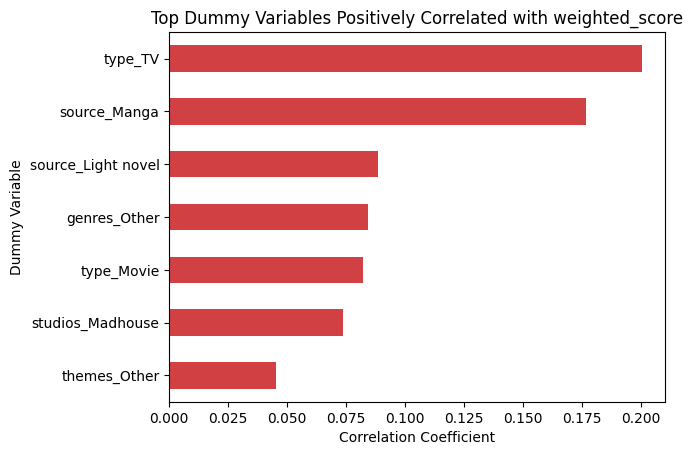

In [49]:
#Dummy Variables with Highest Correlation to Weighted Score
dummy_cols = [col for col in anime_clean.columns if col.startswith(('genres_', 'themes_', 'type_', 'studios_', 'source_', 'demographic_'))]
correlations = anime_clean[dummy_cols + ['weighted_score']].corr()['weighted_score'].drop('weighted_score')
top_corr = correlations.sort_values(ascending=False).head(7)
top_corr.plot(kind='barh', color="#d14043")
plt.title("Top Dummy Variables Positively Correlated with weighted_score")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Dummy Variable")
plt.gca().invert_yaxis()
plt.show()

# Confounding Variables

In [50]:
columns_to_remove = ['anime_id', 'name']
anime_clean = anime_clean.drop(columns=columns_to_remove)

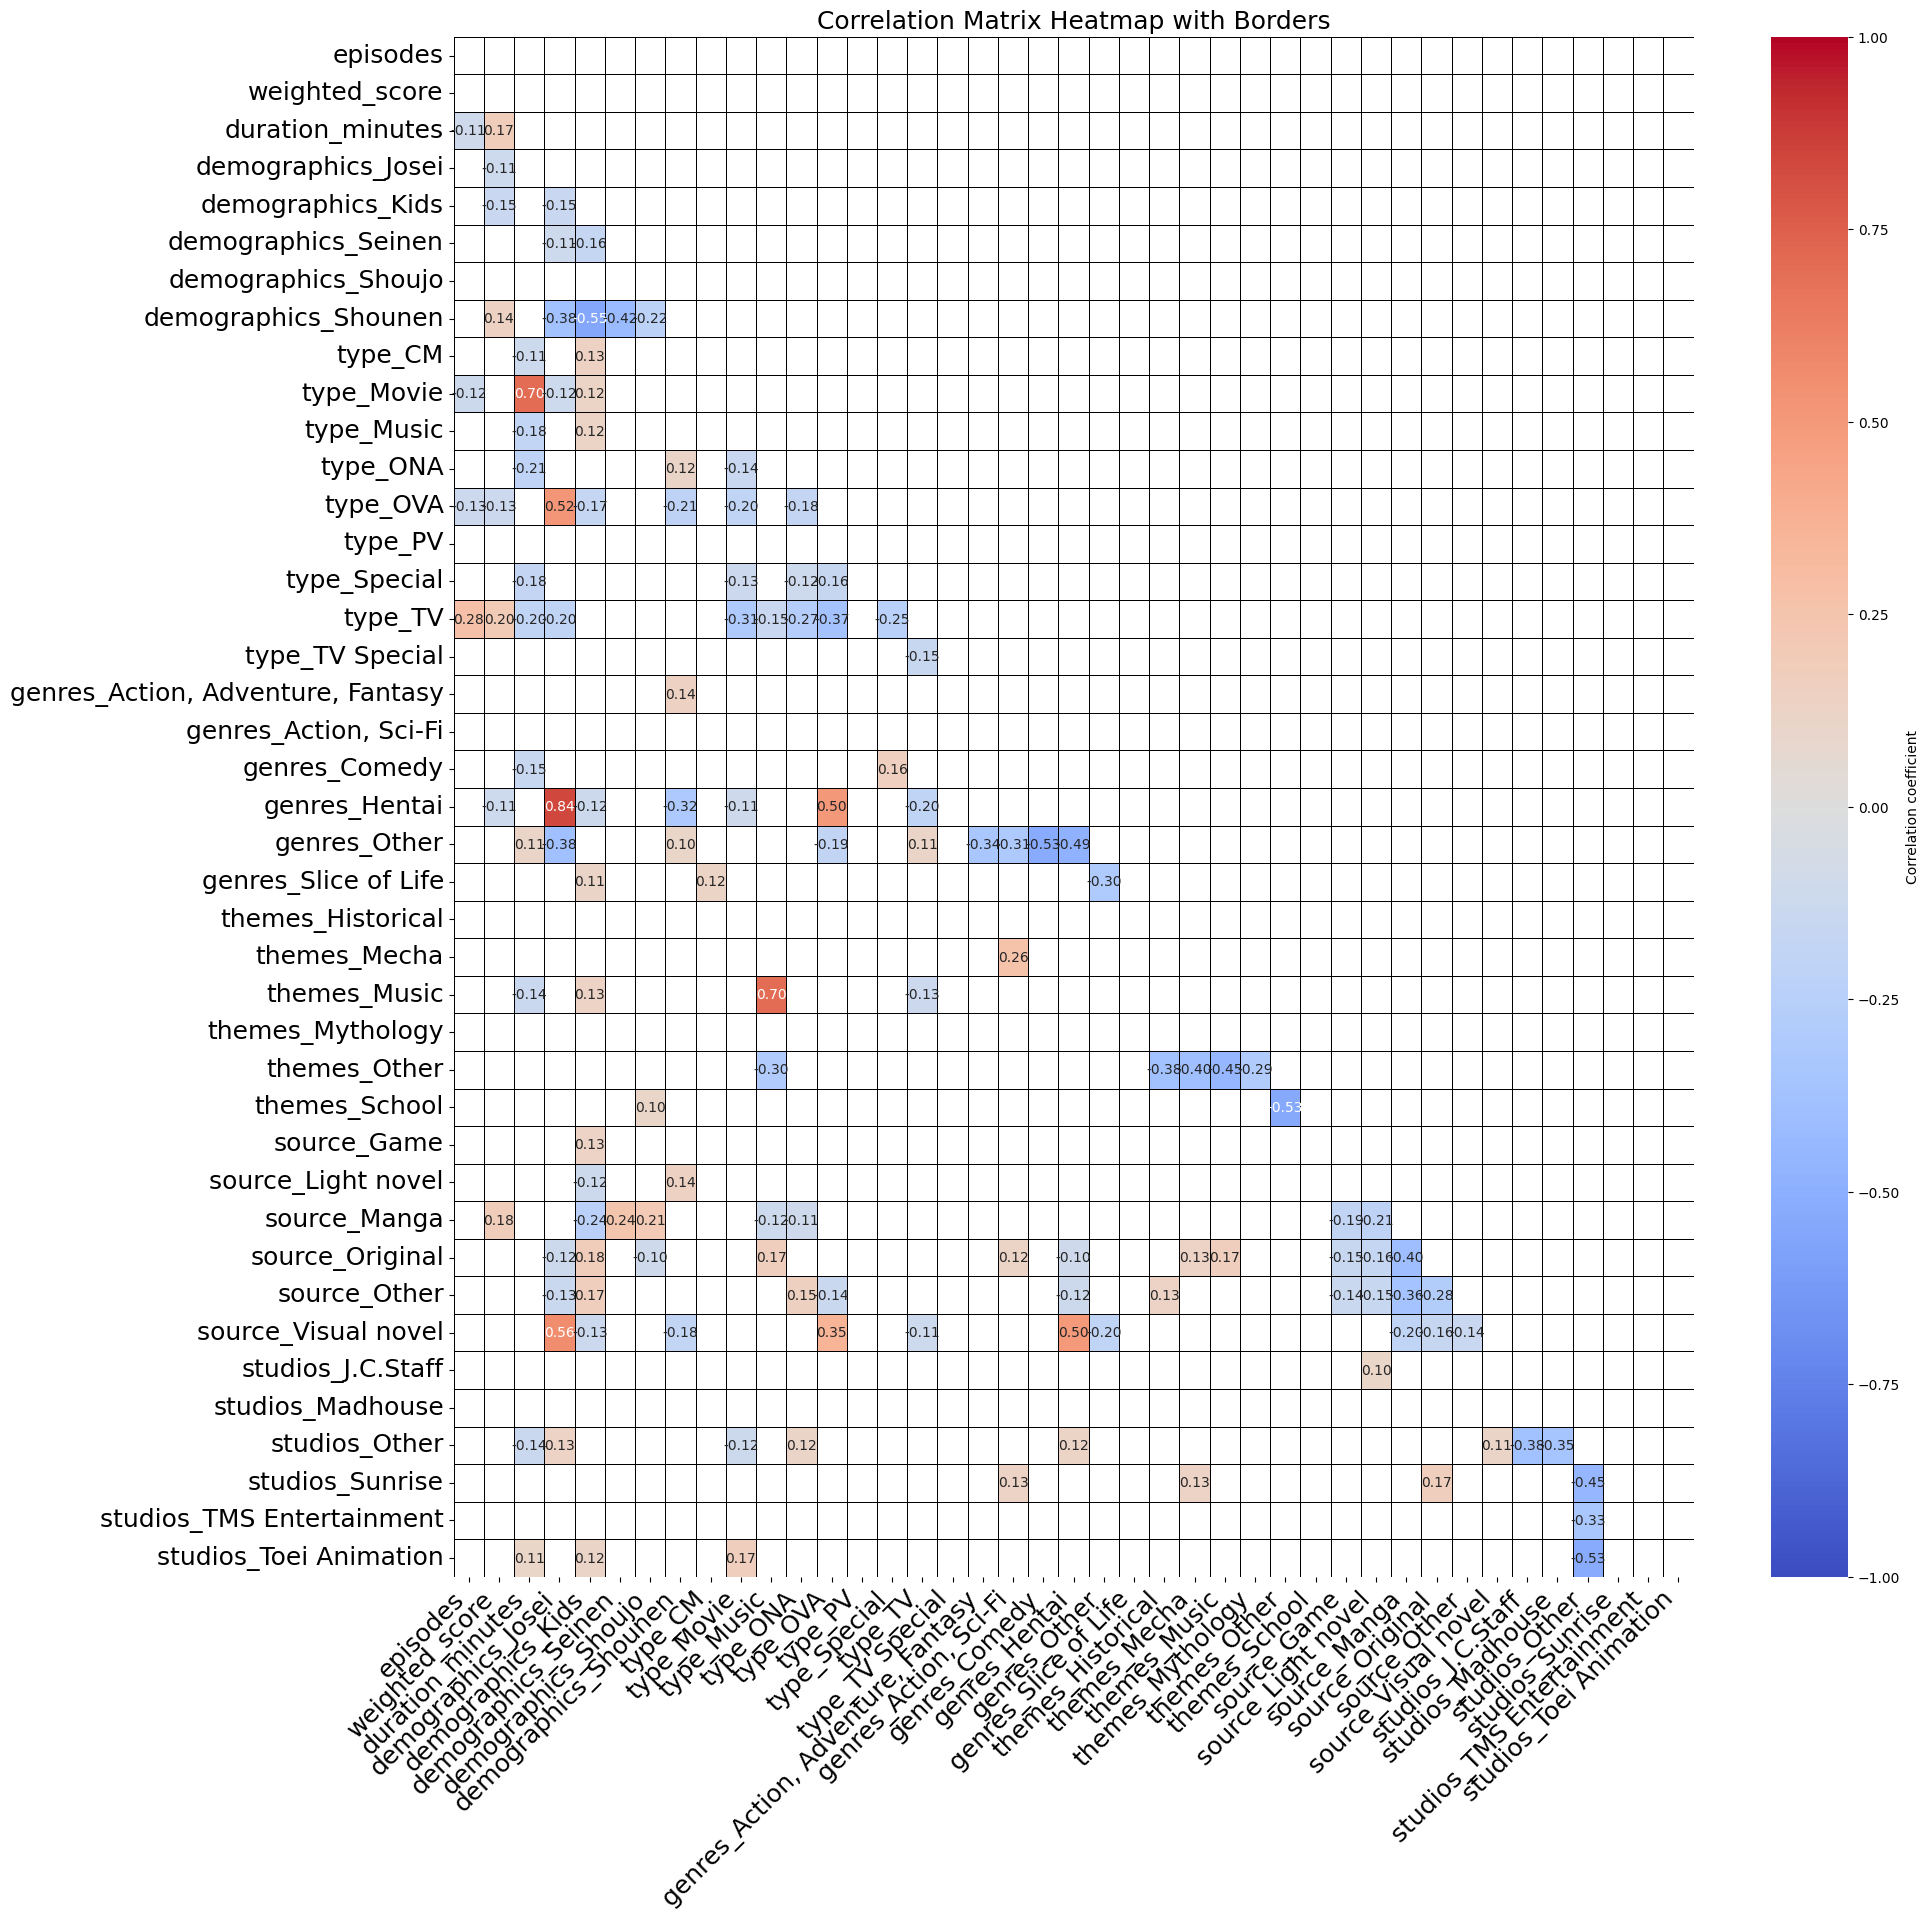

In [51]:
correlation_matrix = anime_clean.corr()

# Filter the correlation matrix by keeping only correlations with absolute value greater than 0.1
filtered_corr_matrix = correlation_matrix.where(abs(correlation_matrix) > 0.1)

# Remove rows and columns that are entirely NaN after applying the filter
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Mask the upper triangle of the matrix to avoid redundant values
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1, mask=mask,
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Correlation coefficient'})

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

plt.title('Correlation Matrix Heatmap with Borders', fontsize=18)
plt.show()

In [52]:
anime_clean = anime_clean.rename(columns={'studios_TMS Entertainment': 'studios_TMS_Entertainment', 'genres_Action, Sci-Fi': 'genres_Action_Sci_Fi', 'type_TV Special': 'type_TV_Special', 'genres_Action, Adventure, Fantasy': 'genres_Action_Adventure_Fantasy', 'studios_J.C.Staff': 'studios_J_C_Staff', 'source_Light novel': 'source_Light_Novel', 'source_Visual novel': 'source_Visual_Novel', 'studios_Toei Animation': 'studios_Toei_Animation', 'genres_Slice of Life': 'genres_Slice_of_Life'})

In [53]:
# List of potential confounders
potential_confounders = ['episodes', 'duration_minutes', 'demographics_Josei',
       'demographics_Kids', 'demographics_Seinen', 'demographics_Shoujo',
       'demographics_Shounen', 'type_CM', 'type_Movie', 'type_Music',
       'type_ONA', 'type_OVA', 'type_PV', 'type_Special',
       'type_TV_Special', 'genres_Action_Adventure_Fantasy',
       'genres_Action_Sci_Fi', 'genres_Comedy', 'genres_Hentai',
       'genres_Other', 'genres_Slice_of_Life', 'themes_Historical',
       'themes_Mecha', 'themes_Music', 'themes_Mythology', 'themes_Other',
       'themes_School', 'source_Game', 'source_Light_Novel', 'source_Manga',
       'source_Original', 'source_Other', 'source_Visual_Novel',
       'studios_J_C_Staff', 'studios_Madhouse', 'studios_Other',
       'studios_Sunrise', 'studios_TMS_Entertainment',
       'studios_Toei_Animation']

# Fit the base model (without any confounders)
model_no_confounders = smf.ols('weighted_score ~ type_TV', data=anime_clean).fit()
print("Model without confounders:")
print(model_no_confounders.summary())

# Initialize a list to store confounders
confounding_variables = []

# Loop over potential confounders
for confounder in potential_confounders:
    # Add the confounder to the model
    formula = f'weighted_score ~ type_TV + {confounder}'

    # Fit the regression model with the confounder
    model_with_confounder = smf.ols(formula, data=anime_clean).fit()

    # Compare the coefficients and p-values of the confounder model vs the base model
    base_coeff = model_no_confounders.params['type_TV[T.True]']
    confounder_coeff = model_with_confounder.params['type_TV[T.True]']
    p_value_base = model_no_confounders.pvalues['type_TV[T.True]']
    p_value_confounder = model_with_confounder.pvalues['type_TV[T.True]']

    # Check if the coefficient of 'type_TV' changes significantly
    coefficient_change = abs(base_coeff - confounder_coeff) / abs(base_coeff)

    # If the change is significant, the confounder might be affecting the relationship
    if coefficient_change > 0.001:
        print(f"Confounding variable: {confounder}")
        print(f"Base model coefficient for type_TV: {base_coeff:.4f} (p-value: {p_value_base:.4f})")
        print(f"Model with {confounder} coefficient for type_TV: {confounder_coeff:.4f} (p-value: {p_value_confounder:.4f})")
        print(f"Coefficient change: {coefficient_change:.4f}")
        print("This variable is a confounder.\n")
        confounding_variables.append(confounder)
    else:
        print(f"Variable {confounder} does not appear to be a confounder.\n")

# Output the list of confounding variables
print("Confounding variables identified:")
print(confounding_variables)
print(len(confounding_variables))

Model without confounders:
                            OLS Regression Results                            
Dep. Variable:         weighted_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     510.7
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          8.01e-111
Time:                        21:49:04   Log-Likelihood:                -4415.4
No. Observations:               12232   AIC:                             8835.
Df Residuals:                   12230   BIC:                             8850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept      

In [54]:
# remove variables that are not confounding
confounding_variables.append('weighted_score')
confounding_variables.append('type_TV')
anime_clean = anime_clean[confounding_variables]
anime_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12232 entries, 0 to 12231
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   episodes                12232 non-null  float64
 1   duration_minutes        12232 non-null  float64
 2   demographics_Josei      12232 non-null  bool   
 3   demographics_Seinen     12232 non-null  bool   
 4   demographics_Shoujo     12232 non-null  bool   
 5   demographics_Shounen    12232 non-null  bool   
 6   type_CM                 12232 non-null  bool   
 7   type_Movie              12232 non-null  bool   
 8   type_Music              12232 non-null  bool   
 9   type_ONA                12232 non-null  bool   
 10  type_OVA                12232 non-null  bool   
 11  type_PV                 12232 non-null  bool   
 12  type_Special            12232 non-null  bool   
 13  genres_Action_Sci_Fi    12232 non-null  bool   
 14  genres_Comedy           12232 non-null

# Multivariate Regression

In [55]:
anime_clean.corr(numeric_only = True)["weighted_score"].sort_values(ascending = False)

,weighted_score
weighted_score,1.000000
type_TV,0.200217
source_Manga,0.176428
duration_minutes,0.172408
demographics_Shounen,0.136372
source_Light_Novel,0.088328
genres_Other,0.084387
type_Movie,0.081979
studios_Madhouse,0.073735
demographics_Shoujo,0.055390


In [56]:
corr_series = anime_clean.corr(numeric_only=True)["weighted_score"]
corr_abs_sorted = corr_series.abs().sort_values(ascending=False)
# top_n = 7
top_features = corr_abs_sorted[corr_abs_sorted > 0.07]

selected_corr = corr_series[top_features.index]
print(selected_corr)


weighted_score          1.000000
type_TV                 0.200217
source_Manga            0.176428
duration_minutes        0.172408
demographics_Shounen    0.136372
type_OVA               -0.125460
demographics_Josei     -0.113641
genres_Hentai          -0.111141
type_ONA               -0.092143
source_Game            -0.089446
source_Light_Novel      0.088328
source_Visual_Novel    -0.085822
genres_Other            0.084387
type_Movie              0.081979
source_Original        -0.079609
studios_Madhouse        0.073735
source_Other           -0.072259
type_Special           -0.070416
Name: weighted_score, dtype: float64


In [57]:
from statsmodels.iolib.summary2 import summary_col

ols_1 = smf.ols("weighted_score ~ type_TV", data = anime_clean).fit()
ols_2 = smf.ols("weighted_score ~ type_TV + source_Manga", data = anime_clean).fit()
ols_3 = smf.ols("weighted_score ~ type_TV + duration_minutes", data = anime_clean).fit()
ols_4 = smf.ols("weighted_score ~ type_TV + demographics_Shounen", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + source_Game", data = anime_clean).fit()
ols_10 = smf.ols("weighted_score ~ type_TV + source_Light_Novel", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + source_Original", data = anime_clean).fit()
ols_15 = smf.ols("weighted_score ~ type_TV + studios_Madhouse", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + type_Special", data = anime_clean).fit()



summary_col([ols_1, ols_2, ols_3, ols_4,ols_5, ols_6, ols_7,ols_8,ols_9,ols_10,ols_11,ols_12,ols_13,ols_14,ols_15,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII,weighted_score IIIIIIIIIIIII,weighted_score IIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIIIII
Intercept,6.8611***,6.8206***,6.7647***,6.8119***,6.8773***,6.8739***,6.8721***,6.8692***,6.8697***,6.8555***,6.8694***,6.8229***,6.8256***,6.8761***,6.8576***,6.8741***,6.8652***
,(0.0039),(0.0044),(0.0055),(0.0053),(0.0047),(0.0042),(0.0042),(0.0043),(0.0040),(0.0040),(0.0041),(0.0067),(0.0044),(0.0043),(0.0040),(0.0042),(0.0043)
type_TV[T.True],0.1473***,0.1415***,0.1789***,0.1407***,0.1311***,0.1361***,0.1363***,0.1392***,0.1456***,0.1425***,0.1420***,0.1421***,0.1828***,0.1454***,0.1460***,0.1478***,0.1432***
,(0.0065),(0.0064),(0.0065),(0.0065),(0.0070),(0.0066),(0.0066),(0.0068),(0.0065),(0.0065),(0.0065),(0.0065),(0.0068),(0.0065),(0.0065),(0.0065),(0.0067)
source_Manga[T.True],,0.1251***,,,,,,,,,,,,,,,
,,(0.0065),,,,,,,,,,,,,,,
duration_minutes,,,0.0030***,,,,,,,,,,,,,,
,,,(0.0001),,,,,,,,,,,,,,
demographics_Shounen[T.True],,,,0.0880***,,,,,,,,,,,,,
,,,,(0.0063),,,,,,,,,,,,,


In [58]:
# We choose duration_minutes since R-squared Adj. increased

In [59]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes", data = anime_clean).fit()
ols_2 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga", data = anime_clean).fit()
ols_4 = smf.ols("weighted_score ~ type_TV + duration_minutes + demographics_Shounen", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Game", data = anime_clean).fit()
ols_10 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Light_Novel", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Original", data = anime_clean).fit()
ols_15 = smf.ols("weighted_score ~ type_TV + duration_minutes + studios_Madhouse", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + type_Special", data = anime_clean).fit()



summary_col([ols_1, ols_2,ols_4,ols_5, ols_6, ols_7,ols_8,ols_9,ols_10,ols_11,ols_12,ols_13,ols_14,ols_15,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII,weighted_score IIIIIIIIIIIII,weighted_score IIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIIII
Intercept,6.7647***,6.7328***,6.7206***,6.7779***,6.7764***,6.7749***,6.7574***,6.7737***,6.7585***,6.7728***,6.7464***,6.7650***,6.7792***,6.7632***,6.7777***,6.7556***
,(0.0055),(0.0057),(0.0063),(0.0061),(0.0057),(0.0057),(0.0062),(0.0055),(0.0055),(0.0056),(0.0073),(0.0055),(0.0058),(0.0054),(0.0056),(0.0060)
type_TV[T.True],0.1789***,0.1720***,0.1721***,0.1665***,0.1699***,0.1701***,0.1844***,0.1770***,0.1741***,0.1741***,0.1755***,0.1796***,0.1769***,0.1774***,0.1795***,0.1858***
,(0.0065),(0.0064),(0.0065),(0.0070),(0.0066),(0.0066),(0.0069),(0.0065),(0.0065),(0.0065),(0.0065),(0.0067),(0.0065),(0.0065),(0.0065),(0.0068)
duration_minutes,0.0030***,0.0028***,0.0029***,0.0030***,0.0029***,0.0029***,0.0031***,0.0030***,0.0030***,0.0030***,0.0029***,0.0030***,0.0030***,0.0030***,0.0030***,0.0031***
,(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0002),(0.0001),(0.0001),(0.0001),(0.0001)
source_Manga[T.True],,0.1138***,,,,,,,,,,,,,,
,,(0.0064),,,,,,,,,,,,,,
demographics_Shounen[T.True],,,0.0823***,,,,,,,,,,,,,
,,,(0.0062),,,,,,,,,,,,,


In [60]:
# We choose source_Manga since R-squared Adj. increased

In [61]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga", data = anime_clean).fit()
ols_4 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + source_Game", data = anime_clean).fit()
ols_10 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + source_Light_Novel", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + source_Original", data = anime_clean).fit()
ols_15 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + studios_Madhouse", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_4,ols_5, ols_6, ols_7,ols_8,ols_9,ols_10,ols_11,ols_12,ols_13,ols_14,ols_15,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII,weighted_score IIIIIIIIIIIII,weighted_score IIIIIIIIIIIIII,weighted_score IIIIIIIIIIIIIII
Intercept,6.7328***,6.6842***,6.7498***,6.7448***,6.7431***,6.7205***,6.7407***,6.7183***,6.7376***,6.7155***,6.7339***,6.7348***,6.7320***,6.7386***,6.7272***
,(0.0057),(0.0066),(0.0062),(0.0059),(0.0059),(0.0065),(0.0058),(0.0057),(0.0059),(0.0074),(0.0057),(0.0063),(0.0057),(0.0061),(0.0062)
type_TV[T.True],0.1720***,0.1644***,0.1548***,0.1626***,0.1631***,0.1807***,0.1712***,0.1634***,0.1700***,0.1687***,0.1743***,0.1719***,0.1708***,0.1725***,0.1766***
,(0.0064),(0.0064),(0.0069),(0.0066),(0.0066),(0.0068),(0.0064),(0.0064),(0.0064),(0.0065),(0.0066),(0.0064),(0.0064),(0.0064),(0.0067)
source_Manga[T.True],0.1138***,0.1187***,0.1178***,0.1144***,0.1139***,0.1160***,0.1067***,0.1320***,0.1102***,0.1136***,0.1144***,0.1119***,0.1122***,0.1075***,0.1128***
,(0.0064),(0.0064),(0.0064),(0.0064),(0.0064),(0.0064),(0.0065),(0.0065),(0.0065),(0.0064),(0.0064),(0.0070),(0.0064),(0.0069),(0.0064)
duration_minutes,0.0028***,0.0028***,0.0028***,0.0028***,0.0028***,0.0030***,0.0028***,0.0028***,0.0028***,0.0028***,0.0027***,0.0028***,0.0028***,0.0029***,0.0029***
,(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0002),(0.0001),(0.0001),(0.0001),(0.0001)
demographics_Shounen[T.True],,0.0883***,,,,,,,,,,,,,
,,(0.0061),,,,,,,,,,,,,


In [62]:
# We choose demographics_Shounen since R-squared Adj. increased

In [63]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Game", data = anime_clean).fit()
ols_10 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Original", data = anime_clean).fit()
ols_15 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + studios_Madhouse", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_5, ols_6, ols_7,ols_8,ols_9,ols_10,ols_11,ols_12,ols_13,ols_14,ols_15,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII,weighted_score IIIIIIIIIIIII,weighted_score IIIIIIIIIIIIII
Intercept,6.6842***,6.6968***,6.6892***,6.6896***,6.6795***,6.6920***,6.6764***,6.6845***,6.6738***,6.6853***,6.6868***,6.6825***,6.6903***,6.6824***
,(0.0066),(0.0073),(0.0073),(0.0071),(0.0070),(0.0067),(0.0066),(0.0070),(0.0079),(0.0066),(0.0071),(0.0066),(0.0069),(0.0069)
type_TV[T.True],0.1644***,0.1546***,0.1624***,0.1618***,0.1685***,0.1636***,0.1577***,0.1643***,0.1624***,0.1672***,0.1643***,0.1629***,0.1650***,0.1661***
,(0.0064),(0.0069),(0.0065),(0.0065),(0.0068),(0.0064),(0.0064),(0.0064),(0.0064),(0.0066),(0.0064),(0.0064),(0.0064),(0.0067)
source_Manga[T.True],0.1187***,0.1208***,0.1186***,0.1185***,0.1196***,0.1115***,0.1339***,0.1185***,0.1185***,0.1194***,0.1161***,0.1170***,0.1118***,0.1183***
,(0.0064),(0.0064),(0.0064),(0.0064),(0.0064),(0.0065),(0.0065),(0.0065),(0.0064),(0.0064),(0.0069),(0.0064),(0.0068),(0.0064)
demographics_Shounen[T.True],0.0883***,0.0837***,0.0846***,0.0844***,0.0866***,0.0885***,0.0795***,0.0881***,0.0870***,0.0886***,0.0884***,0.0897***,0.0886***,0.0878***
,(0.0061),(0.0062),(0.0066),(0.0064),(0.0062),(0.0061),(0.0061),(0.0062),(0.0061),(0.0061),(0.0061),(0.0061),(0.0061),(0.0061)
duration_minutes,0.0028***,0.0027***,0.0028***,0.0028***,0.0028***,0.0028***,0.0028***,0.0028***,0.0027***,0.0026***,0.0028***,0.0027***,0.0028***,0.0028***
,(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0001),(0.0002),(0.0001),(0.0001),(0.0001),(0.0001)


In [64]:
# We choose source_Light_Novel since R-squared Adj. increased

In [65]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + source_Game", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + source_Original", data = anime_clean).fit()
ols_15 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_5, ols_6, ols_7,ols_8,ols_9,ols_11,ols_12,ols_13,ols_14,ols_15,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII,weighted_score IIIIIIIIIIIII
Intercept,6.6764***,6.6901***,6.6812***,6.6816***,6.6698***,6.6829***,6.6741***,6.6669***,6.6777***,6.6695***,6.6749***,6.6763***,6.6760***
,(0.0066),(0.0073),(0.0073),(0.0071),(0.0071),(0.0067),(0.0070),(0.0079),(0.0066),(0.0072),(0.0066),(0.0070),(0.0069)
type_TV[T.True],0.1577***,0.1469***,0.1559***,0.1553***,0.1633***,0.1574***,0.1583***,0.1559***,0.1609***,0.1576***,0.1564***,0.1577***,0.1582***
,(0.0064),(0.0069),(0.0065),(0.0065),(0.0068),(0.0064),(0.0064),(0.0064),(0.0066),(0.0064),(0.0064),(0.0064),(0.0067)
source_Manga[T.True],0.1339***,0.1364***,0.1339***,0.1338***,0.1354***,0.1276***,0.1354***,0.1337***,0.1348***,0.1413***,0.1321***,0.1341***,0.1338***
,(0.0065),(0.0065),(0.0065),(0.0065),(0.0065),(0.0066),(0.0066),(0.0065),(0.0065),(0.0072),(0.0065),(0.0071),(0.0065)
demographics_Shounen[T.True],0.0795***,0.0744***,0.0760***,0.0758***,0.0770***,0.0801***,0.0806***,0.0783***,0.0798***,0.0787***,0.0810***,0.0795***,0.0794***
,(0.0061),(0.0063),(0.0066),(0.0064),(0.0062),(0.0061),(0.0062),(0.0062),(0.0061),(0.0061),(0.0061),(0.0061),(0.0062)
source_Light_Novel[T.True],0.1259***,0.1274***,0.1258***,0.1257***,0.1277***,0.1194***,0.1270***,0.1255***,0.1264***,0.1335***,0.1243***,0.1261***,0.1258***
,(0.0114),(0.0114),(0.0114),(0.0114),(0.0114),(0.0115),(0.0114),(0.0114),(0.0114),(0.0119),(0.0114),(0.0118),(0.0114)


In [66]:
# We choose studios_Madhouse since R-squared Adj. increased

In [67]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + type_ONA", data = anime_clean).fit()
ols_9 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Original", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_5, ols_6, ols_7,ols_8,ols_9,ols_11,ols_12,ols_13,ols_14,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII,weighted_score IIIIIIIIIIII
Intercept,6.6749***,6.6887***,6.6788***,6.6793***,6.6679***,6.6813***,6.6720***,6.6665***,6.6762***,6.6680***,6.6752***,6.6748***
,(0.0066),(0.0073),(0.0073),(0.0071),(0.0071),(0.0067),(0.0070),(0.0079),(0.0066),(0.0072),(0.0070),(0.0069)
type_TV[T.True],0.1564***,0.1455***,0.1549***,0.1544***,0.1624***,0.1561***,0.1570***,0.1548***,0.1596***,0.1563***,0.1564***,0.1566***
,(0.0064),(0.0069),(0.0065),(0.0065),(0.0067),(0.0064),(0.0064),(0.0064),(0.0065),(0.0064),(0.0064),(0.0067)
source_Manga[T.True],0.1321***,0.1346***,0.1320***,0.1320***,0.1336***,0.1258***,0.1339***,0.1319***,0.1330***,0.1394***,0.1317***,0.1321***
,(0.0065),(0.0065),(0.0065),(0.0065),(0.0065),(0.0066),(0.0066),(0.0065),(0.0065),(0.0072),(0.0071),(0.0065)
demographics_Shounen[T.True],0.0810***,0.0758***,0.0781***,0.0779***,0.0783***,0.0816***,0.0823***,0.0799***,0.0813***,0.0802***,0.0810***,0.0810***
,(0.0061),(0.0063),(0.0066),(0.0064),(0.0062),(0.0061),(0.0062),(0.0062),(0.0061),(0.0061),(0.0061),(0.0062)
source_Light_Novel[T.True],0.1243***,0.1258***,0.1243***,0.1242***,0.1262***,0.1179***,0.1257***,0.1240***,0.1248***,0.1319***,0.1240***,0.1243***
,(0.0114),(0.0114),(0.0114),(0.0114),(0.0114),(0.0115),(0.0114),(0.0114),(0.0114),(0.0119),(0.0118),(0.0114)


In [68]:
# We choose source_Game since R-squared Adj. increased

In [69]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game", data = anime_clean).fit()
ols_5 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_ONA", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + source_Original", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_5, ols_6, ols_7,ols_8,ols_11,ols_12,ols_13,ols_14,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII,weighted_score IIIIIIIIIII
Intercept,6.6813***,6.6966***,6.6867***,6.6869***,6.6740***,6.6798***,6.6722***,6.6826***,6.6778***,6.6854***,6.6811***
,(0.0067),(0.0075),(0.0075),(0.0073),(0.0072),(0.0072),(0.0080),(0.0067),(0.0076),(0.0073),(0.0070)
type_TV[T.True],0.1561***,0.1444***,0.1541***,0.1536***,0.1624***,0.1564***,0.1544***,0.1594***,0.1561***,0.1566***,0.1563***
,(0.0064),(0.0069),(0.0065),(0.0065),(0.0067),(0.0064),(0.0064),(0.0065),(0.0064),(0.0064),(0.0067)
source_Manga[T.True],0.1258***,0.1280***,0.1256***,0.1254***,0.1273***,0.1268***,0.1255***,0.1267***,0.1295***,0.1211***,0.1258***
,(0.0066),(0.0066),(0.0066),(0.0066),(0.0066),(0.0068),(0.0066),(0.0066),(0.0077),(0.0074),(0.0066)
demographics_Shounen[T.True],0.0816***,0.0761***,0.0777***,0.0778***,0.0788***,0.0822***,0.0805***,0.0819***,0.0812***,0.0821***,0.0815***
,(0.0061),(0.0062),(0.0066),(0.0064),(0.0062),(0.0062),(0.0062),(0.0061),(0.0061),(0.0061),(0.0062)
source_Light_Novel[T.True],0.1179***,0.1190***,0.1176***,0.1175***,0.1198***,0.1186***,0.1173***,0.1183***,0.1217***,0.1130***,0.1178***
,(0.0115),(0.0115),(0.0115),(0.0115),(0.0115),(0.0115),(0.0115),(0.0115),(0.0121),(0.0120),(0.0115)


In [70]:
# We choose type_OVA since R-squared Adj. increased

In [71]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + type_ONA", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Original", data = anime_clean).fit()
ols_16 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_6, ols_7,ols_8,ols_11,ols_12,ols_13,ols_14,ols_16,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII,weighted_score IIIIIIIIII
Intercept,6.6966***,6.6956***,6.6965***,6.6910***,6.6931***,6.6895***,6.6964***,6.6947***,6.7035***,6.7009***
,(0.0075),(0.0078),(0.0077),(0.0084),(0.0077),(0.0089),(0.0076),(0.0085),(0.0082),(0.0082)
type_TV[T.True],0.1444***,0.1444***,0.1444***,0.1490***,0.1436***,0.1437***,0.1450***,0.1445***,0.1444***,0.1404***
,(0.0069),(0.0069),(0.0069),(0.0076),(0.0069),(0.0069),(0.0075),(0.0069),(0.0069),(0.0075)
source_Manga[T.True],0.1280***,0.1283***,0.1281***,0.1286***,0.1325***,0.1277***,0.1281***,0.1299***,0.1213***,0.1290***
,(0.0066),(0.0066),(0.0066),(0.0066),(0.0069),(0.0066),(0.0066),(0.0077),(0.0074),(0.0067)
demographics_Shounen[T.True],0.0761***,0.0771***,0.0762***,0.0752***,0.0777***,0.0755***,0.0762***,0.0759***,0.0765***,0.0764***
,(0.0062),(0.0066),(0.0064),(0.0063),(0.0063),(0.0063),(0.0063),(0.0063),(0.0062),(0.0062)
source_Light_Novel[T.True],0.1190***,0.1192***,0.1191***,0.1199***,0.1224***,0.1186***,0.1191***,0.1210***,0.1119***,0.1201***
,(0.0115),(0.0115),(0.0115),(0.0115),(0.0116),(0.0115),(0.0115),(0.0121),(0.0120),(0.0115)


In [72]:
# We choose source_Other since R-squared Adj. increased

In [73]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + genres_Hentai", data = anime_clean).fit()
ols_8 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + source_Original", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_6, ols_7,ols_8,ols_11,ols_12,ols_13,ols_14,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII,weighted_score IIIIIIIII
Intercept,6.7035***,6.7029***,6.7038***,6.6976***,6.6988***,6.6962***,6.7033***,6.7221***,6.7082***
,(0.0082),(0.0086),(0.0085),(0.0090),(0.0087),(0.0095),(0.0083),(0.0136),(0.0089)
type_TV[T.True],0.1444***,0.1444***,0.1444***,0.1498***,0.1438***,0.1437***,0.1449***,0.1438***,0.1402***
,(0.0069),(0.0069),(0.0069),(0.0076),(0.0069),(0.0069),(0.0075),(0.0069),(0.0075)
source_Manga[T.True],0.1213***,0.1215***,0.1212***,0.1213***,0.1267***,0.1208***,0.1213***,0.1034***,0.1221***
,(0.0074),(0.0075),(0.0075),(0.0074),(0.0081),(0.0074),(0.0074),(0.0128),(0.0075)
demographics_Shounen[T.True],0.0765***,0.0770***,0.0763***,0.0755***,0.0777***,0.0759***,0.0766***,0.0777***,0.0768***
,(0.0062),(0.0066),(0.0064),(0.0063),(0.0063),(0.0063),(0.0063),(0.0063),(0.0063)
source_Light_Novel[T.True],0.1119***,0.1121***,0.1118***,0.1123***,0.1166***,0.1114***,0.1120***,0.0933***,0.1128***
,(0.0120),(0.0120),(0.0120),(0.0120),(0.0123),(0.0120),(0.0120),(0.0161),(0.0120)


In [74]:
# We choose type_ONA since R-squared Adj. increased

In [75]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + genres_Hentai", data = anime_clean).fit()
ols_11 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Visual_Novel", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + type_Movie", data = anime_clean).fit()
ols_14 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_6, ols_7,ols_11,ols_12,ols_13,ols_14,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII,weighted_score IIIIIII,weighted_score IIIIIIII
Intercept,6.6976***,6.6973***,6.6980***,6.6928***,6.6897***,6.6963***,6.7163***,6.7017***
,(0.0090),(0.0093),(0.0091),(0.0094),(0.0102),(0.0092),(0.0140),(0.0104)
type_TV[T.True],0.1498***,0.1498***,0.1498***,0.1492***,0.1493***,0.1524***,0.1492***,0.1462***
,(0.0076),(0.0076),(0.0076),(0.0076),(0.0076),(0.0085),(0.0076),(0.0090)
source_Manga[T.True],0.1213***,0.1214***,0.1211***,0.1267***,0.1208***,0.1215***,0.1032***,0.1218***
,(0.0074),(0.0075),(0.0075),(0.0081),(0.0074),(0.0074),(0.0128),(0.0075)
demographics_Shounen[T.True],0.0755***,0.0758***,0.0751***,0.0767***,0.0748***,0.0758***,0.0767***,0.0759***
,(0.0063),(0.0066),(0.0065),(0.0063),(0.0063),(0.0063),(0.0063),(0.0063)
source_Light_Novel[T.True],0.1123***,0.1124***,0.1121***,0.1170***,0.1117***,0.1125***,0.0935***,0.1128***
,(0.0120),(0.0120),(0.0120),(0.0123),(0.0120),(0.0120),(0.0161),(0.0120)


In [76]:
# We choose source_Original and source_Visual_Novel since R-squared Adj. increased to the same value as these variables and they are both significant (p-val<0.1)

In [77]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Hentai", data = anime_clean).fit()
ols_12 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + type_Movie", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_6, ols_7,ols_12,ols_13,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII,weighted_score IIIIII
Intercept,5.7640***,5.7655***,5.7655***,5.7561***,5.7629***,5.7686***
,(0.0071),(0.0075),(0.0073),(0.0083),(0.0073),(0.0087)
type_TV[T.True],0.1492***,0.1492***,0.1491***,0.1486***,0.1520***,0.1447***
,(0.0076),(0.0076),(0.0076),(0.0076),(0.0085),(0.0090)
source_Manga[T.True],1.0555***,1.0553***,1.0551***,1.0538***,1.0554***,1.0566***
,(0.0055),(0.0055),(0.0055),(0.0056),(0.0055),(0.0056)
demographics_Shounen[T.True],0.0767***,0.0753***,0.0753***,0.0761***,0.0771***,0.0773***
,(0.0063),(0.0066),(0.0065),(0.0063),(0.0063),(0.0063)
source_Light_Novel[T.True],1.0458***,1.0455***,1.0454***,1.0439***,1.0456***,1.0468***
,(0.0097),(0.0097),(0.0097),(0.0098),(0.0097),(0.0098)


In [78]:
# We choose genres_Other since R-squared Adj. increased

In [79]:
ols_1 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other", data = anime_clean).fit()
ols_6 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other + demographics_Josei", data = anime_clean).fit()
ols_7 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other + genres_Hentai", data = anime_clean).fit()
ols_13 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other + type_Movie", data = anime_clean).fit()
ols_17 = smf.ols("weighted_score ~ type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other + type_Special", data = anime_clean).fit()



summary_col([ols_1,ols_6, ols_7,ols_13,ols_17], stars = True)


,weighted_score I,weighted_score II,weighted_score III,weighted_score IIII,weighted_score IIIII
Intercept,5.7561***,5.7565***,5.7565***,5.7548***,5.7604***
,(0.0083),(0.0091),(0.0092),(0.0085),(0.0098)
type_TV[T.True],0.1486***,0.1486***,0.1486***,0.1516***,0.1445***
,(0.0076),(0.0076),(0.0076),(0.0085),(0.0090)
source_Manga[T.True],1.0538***,1.0538***,1.0538***,1.0537***,1.0548***
,(0.0056),(0.0056),(0.0056),(0.0056),(0.0057)
demographics_Shounen[T.True],0.0761***,0.0758***,0.0759***,0.0765***,0.0766***
,(0.0063),(0.0066),(0.0065),(0.0064),(0.0064)
source_Light_Novel[T.True],1.0439***,1.0439***,1.0439***,1.0437***,1.0448***
,(0.0098),(0.0098),(0.0098),(0.0098),(0.0098)


The R-sqaured Adj has not changed hence here is the final regression model:   
`weighted_score = type_TV + duration_minutes + source_Manga + demographics_Shounen + source_Light_Novel + studios_Madhouse + source_Game + type_OVA + source_Other + type_ONA + source_Original + source_Visual_Novel + genres_Other`

In [80]:
ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weighted_score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:49:11   Log-Likelihood:                -3745.0
No. Observations:               12232   AIC:                             7516.
Df Residuals:                   12219   BIC:                             7612.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.7561      0.008    689.596      0.000       5.740       5.772
type_TV[T.True]                  0.1486      0.008     19.552      0.000       0.134       0.163
source_Manga[T.True]             1.0538      0.006    189.439      0.000       1.043       1.065
demographics_Shounen[T.True]     0.0761      0.006     12.028      0.000       0.064       0.088
source_Light_Novel[T.True]       1.0439      0.010    106.958      0.000       1.025       1.063
studios_Madhouse[T.True]         0.1192      0.019      6.301      0.000       0.082       0.156
source_Game[T.True]              0.8651      0.010     84.000      0.000       0.845       0.885
type_OVA[T.True]                -0.0388      0.009     -4.166      0.000      -0.057      -0.021
source_Other[T.True]             0.9128      0.007    136.055      0.000       0.900       0.926
type_ONA[T.True]                 0.0197      0.011      1.799      0.072      -0.002       0.041
source_Original[T.True]          0.9269      0.006    149.751      0.000       0.915       0.939
source_Visual_Novel[T.True]      0.9535      0.011     89.214      0.000       0.933       0.974
genres_Other[T.True]             0.0135      0.007      1.839      0.066      -0.001       0.028
duration_minutes                 0.0027      0.000     21.955      0.000       0.002       0.003
==============================================================================
Omnibus:                     4817.667   Durbin-Watson:                   0.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24205.016
Skew:                           1.856   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                     5.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

An Adjusted R-squared value of 0.139 indicates that the current model explains only 13.9% of the variation in the dependent variable, which suggests that the model could be improved by adding more predictors, checking for non-linear relationships, or exploring other modeling techniques.

# Causal Analysis

In [81]:
ols_univariate = smf.ols("weighted_score ~ type_TV", data = anime_clean).fit()
ols_multi_all_confounding = smf.ols("weighted_score ~ type_TV + episodes + duration_minutes + demographics_Josei + demographics_Seinen + demographics_Shoujo + demographics_Shounen + type_CM + type_Movie + type_Music + type_ONA + type_OVA + type_PV + type_Special + genres_Action_Sci_Fi + genres_Comedy + genres_Hentai + genres_Other + themes_Mecha + themes_Music + themes_Other + themes_School + source_Game + source_Light_Novel + source_Manga + source_Original + source_Other + source_Visual_Novel + studios_J_C_Staff + studios_Madhouse + studios_Other + studios_Toei_Animation", data = anime_clean).fit()

In [82]:
ols_univariate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weighted_score   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     510.7
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          8.01e-111
Time:                        21:49:11   Log-Likelihood:                -4415.4
No. Observations:               12232   AIC:                             8835.
Df Residuals:                   12230   BIC:                             8850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8611      0.004   1740.612      0.000       6.853       6.869
type_TV[T.True]     0.1473      0.007     22.600      0.000       0.135       0.160
==============================================================================
Omnibus:                     5472.182   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29055.198
Skew:                           2.137   Prob(JB):                         0.00
Kurtosis:                       9.224   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
ols_multi_all_confounding.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weighted_score   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     70.08
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:49:11   Log-Likelihood:                -3663.3
No. Observations:               12232   AIC:                             7391.
Df Residuals:                   12200   BIC:                             7628.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          5.7255      0.024    235.610      0.000       5.678       5.773
type_TV[T.True]                    0.1901      0.016     11.578      0.000       0.158       0.222
demographics_Josei[T.True]         0.0288      0.022      1.317      0.188      -0.014       0.072
demographics_Seinen[T.True]        0.0427      0.013      3.350      0.001       0.018       0.068
demographics_Shoujo[T.True]        0.0856      0.019      4.516      0.000       0.048       0.123
demographics_Shounen[T.True]       0.0997      0.009     11.366      0.000       0.082       0.117
type_CM[T.True]                    0.0678      0.033      2.083      0.037       0.004       0.132
type_Movie[T.True]                 0.0549      0.018      3.019      0.003       0.019       0.091
type_Music[T.True]                 0.0855      0.028      3.085      0.002       0.031       0.140
type_ONA[T.True]                   0.0594      0.018      3.237      0.001       0.023       0.095
type_OVA[T.True]                   0.0019      0.017      0.110      0.912      -0.032       0.036
type_PV[T.True]                    0.0705      0.041      1.738      0.082      -0.009       0.150
type_Special[T.True]               0.0353      0.019      1.891      0.059      -0.001       0.072
genres_Action_Sci_Fi[T.True]      -0.0918      0.022     -4.106      0.000      -0.136      -0.048
genres_Comedy[T.True]             -0.0440      0.016     -2.700      0.007      -0.076      -0.012
genres_Hentai[T.True]             -0.0446      0.026     -1.742      0.082      -0.095       0.006
genres_Other[T.True]              -0.0284      0.013     -2.236      0.025      -0.053      -0.003
themes_Mecha[T.True]              -0.0690      0.023     -2.943      0.003      -0.115      -0.023
themes_Music[T.True]               0.0404      0.027      1.521      0.128      -0.012       0.092
themes_Other[T.True]               0.0365      0.015      2.450      0.014       0.007       0.066
themes_School[T.True]              0.0621      0.020      3.149      0.002       0.023       0.101
source_Game[T.True]                0.8643      0.011     78.062      0.000       0.843       0.886
source_Light_Novel[T.True]         1.0285      0.011     97.346      0.000       1.008       1.049
source_Manga[T.True]               1.0428      0.007    146.592      0.000       1.029       1.057
source_Original[T.True]            0.9306      0.007    125.042      0.000       0.916       0.945
source_Other[T.True]               0.9139      0.008    121.587      0.000       0.899       0.929
source_Visual_Novel[T.True]        0.9454      0.013     73.040      0.000       0.920       0.971
studios_J_C_Staff[T.True]          0.0038      0.021      0.178      0.858      -0.038       0.045
studios_Madhou

In [84]:
ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         weighted_score   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     165.4
Date:                Wed, 23 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:49:12   Log-Likelihood:                -3745.0
No. Observations:               12232   AIC:                             7516.
Df Residuals:                   12219   BIC:                             7612.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        5.7561      0.008    689.596      0.000       5.740       5.772
type_TV[T.True]                  0.1486      0.008     19.552      0.000       0.134       0.163
source_Manga[T.True]             1.0538      0.006    189.439      0.000       1.043       1.065
demographics_Shounen[T.True]     0.0761      0.006     12.028      0.000       0.064       0.088
source_Light_Novel[T.True]       1.0439      0.010    106.958      0.000       1.025       1.063
studios_Madhouse[T.True]         0.1192      0.019      6.301      0.000       0.082       0.156
source_Game[T.True]              0.8651      0.010     84.000      0.000       0.845       0.885
type_OVA[T.True]                -0.0388      0.009     -4.166      0.000      -0.057      -0.021
source_Other[T.True]             0.9128      0.007    136.055      0.000       0.900       0.926
type_ONA[T.True]                 0.0197      0.011      1.799      0.072      -0.002       0.041
source_Original[T.True]          0.9269      0.006    149.751      0.000       0.915       0.939
source_Visual_Novel[T.True]      0.9535      0.011     89.214      0.000       0.933       0.974
genres_Other[T.True]             0.0135      0.007      1.839      0.066      -0.001       0.028
duration_minutes                 0.0027      0.000     21.955      0.000       0.002       0.003
==============================================================================
Omnibus:                     4817.667   Durbin-Watson:                   0.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24205.016
Skew:                           1.856   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                     5.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# END